In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
from datetime import datetime 
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pymongo import MongoClient
import Config
import numpy as np
from scipy import stats 
from numpy.random import seed
from numpy.random import randn
from numpy.random import normal
from scipy.stats import ttest_1samp
import warnings
import seaborn as sns
pd.set_option('display.max_columns', None)
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')
    
def pred_errors(X):
    y_pred=[]
    y_orig=[]
    train, test = X[0:100], X[100:len(X)]
    history = [x for x in train]
    
    for t in range(len(test)):
        model = ARIMA(history, order=(1,1,0))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        y_pred.append(yhat)
        obs = test[t]
        history.append(obs)
        y_orig.append(obs)
    
    return [a-b for a,b in zip(y_orig,y_pred)]

warnings.filterwarnings("ignore")
client = MongoClient(Config.DB_Hostname,Config.DB_Port)

In [6]:
path="/Users/praneetshaw/Desktop/Strategy/CFiles/guides/"
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
onlyfiles = [s for s in onlyfiles if ".csv" in s]

#dates=[ datetime.strptime(o[:-18],"%Y-%m-%d") for o in onlyfiles]
dates=[ datetime.strptime(o[:-16],"%Y-%m-%d") for o in onlyfiles]

onlyfiles= [o for d,o in sorted(zip(dates,onlyfiles))]

df=pd.DataFrame()
for f in onlyfiles:
    df=pd.concat([df,pd.read_csv(f)])

df.sort_values(['date','strategy_variant'],inplace=True)

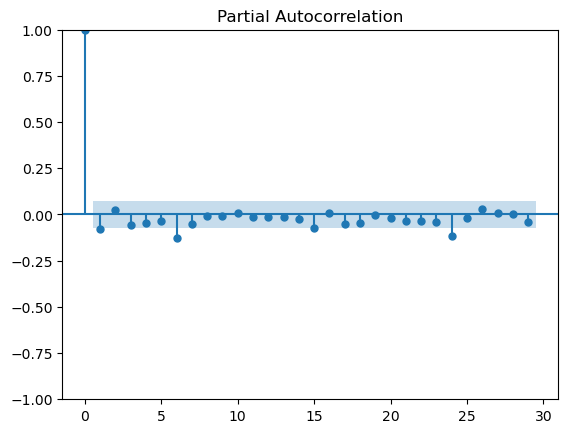

In [50]:
plot_pacf(df[df.strategy_variant==139].pos_param.diff().dropna());

In [3]:
df1=pd.DataFrame(client.Strategy.NIFTY_Guide_Parameters.find({"date":"2020-09-01"}))
df=df[df.date=="2020-09-01"].sort_values('date').drop(columns=["date","underlying"])
df1=df1[df1.date=="2020-09-01"].sort_values('date').drop(columns=["date","underlying","_id"])
(df.sort_values('strategy_variant').set_index('strategy_variant')-df1.sort_values('strategy_variant').set_index('strategy_variant')).describe()


sim_number  pos_param  mov_param  prof_param  strike_offset  sim_vol  \
count       384.0      384.0      384.0       384.0          384.0    384.0   
mean          0.0        0.0        0.0         0.0            0.0      0.0   
std           0.0        0.0        0.0         0.0            0.0      0.0   
min           0.0        0.0        0.0         0.0            0.0      0.0   
25%           0.0        0.0        0.0         0.0            0.0      0.0   
50%           0.0        0.0        0.0         0.0            0.0      0.0   
75%           0.0        0.0        0.0         0.0            0.0      0.0   
max           0.0        0.0        0.0         0.0            0.0      0.0   

       drawdown_count  trade_count  capital    pnl  first_drawdown_pnl  \
count           384.0        384.0    384.0  384.0               384.0   
mean              0.0          0.0      0.0    0.0                 0.0   
std               0.0          0.0      0.0    0.0                 0.0   
min               0.0          0.0      0.0    0.0                 0.0   
25%               0.0          0.0      0.0    0.0                 0.0   
50%               0.0          0.0      0.0    0.0                 0.0   
75%               0.0          0.0      0.0    0.0                 0.0   
max               0.0          0.0      0.0    0.0                 0.0   

       second_drawdown_pnl  taylor_sensitivity_1  taylor_sensitivity_2  \
count                384.0                 384.0                 384.0   
mean                   0.0                   0.0                   0.0   
std                    0.0                   0.0                   0.0   
min                    0.0                   0.0                   0.0   
25%                    0.0                   0.0                   0.0   
50%                    0.0                   0.0                   0.0   
75%                    0.0                   0.0                   0.0   
max                    0.0                   0.0                   0.0   

       taylor_sensitivity_3  pos_dev  mov_dev  prof_dev      pos_diff  \
count                 384.0    384.0    384.0     384.0  3.840000e+02   
mean                    0.0      0.0      0.0       0.0  5.626746e-10   
std                     0.0      0.0      0.0       0.0  3.064867e-09   
min                     0.0      0.0      0.0       0.0  0.000000e+00   
25%                     0.0      0.0      0.0       0.0  0.000000e+00   
50%                     0.0      0.0      0.0       0.0  0.000000e+00   
75%                     0.0      0.0      0.0       0.0  0.000000e+00   
max                     0.0      0.0      0.0       0.0  2.980230e-08   

           mov_diff     prof_diff     pmpr_diff  variant_pnl_mean  \
count  3.840000e+02  3.840000e+02  3.840000e+02             384.0   
mean   1.629813e-09  6.596883e-10  4.166667e-10               0.0   
std    6.784967e-09  3.252535e-09  2.127363e-09               0.0   
min    0.000000e+00  0.000000e+00  0.000000e+00               0.0   
25%    0.000000e+00  0.000000e+00  0.000000e+00               0.0   
50%    0.000000e+00  0.000000e+00  0.000000e+00               0.0   
75%    0.000000e+00  0.000000e+00  0.000000e+00               0.0   
max    2.980230e-08  2.980230e-08  2.000000e-08               0.0   

       variant_positive_pnl_mean  variant_negative_pnl_mean  \
count                      384.0                      384.0   
mean                         0.0                        0.0   
std                          0.0                        0.0   
min                          0.0                        0.0   
25%                          0.0                        0.0   
50%                          0.0                        0.0   
75%                          0.0                        0.0   
max                          0.0                        0.0   

       variant_profit_percent  variant_pnl_stdev  variant_positive_pnl_stdev  \
count                   384.0    

In [5]:
#df.fillna(0,inplace=True)
#print(client.Strategy.NIFTY_Guide_Parameters.delete_many({}).deleted_count,f" documents deleted for ")
#print(len(client.Strategy.NIFTY_Guide_Parameters.insert_many(df.to_dict('records')).inserted_ids),f" documents entered for \n")


533376  documents deleted for 
801408  documents entered for 



In [4]:
"""
df_=df[['date', 'underlying', 'strategy_variant', 'sim_number', 'pos_param',
       'mov_param', 'prof_param', 'strike_offset', 'sim_vol', 'drawdown_count',
       'trade_count', 'capital', 'pnl', 'first_drawdown_pnl',
       'second_drawdown_pnl', 'taylor_sensitivity_1', 'taylor_sensitivity_2',
       'taylor_sensitivity_3', 'pos_diff','pos_dev','mov_dev','prof_dev',
       'mov_diff', 'prof_diff']]
df_[df_.isna().any(axis=1)]"""

date underlying  strategy_variant  sim_number  pos_param  \
274  2017-05-25      NIFTY               275        7437       0.25   
78   2023-06-15      NIFTY                79        3826       0.13   
79   2023-06-15      NIFTY                80        6892       0.23   
80   2023-06-15      NIFTY                81        3154       0.11   
174  2023-06-15      NIFTY               175        7512       0.25   
175  2023-06-15      NIFTY               176        6914       0.23   
176  2023-06-15      NIFTY               177        3136       0.11   
270  2023-06-15      NIFTY               271        8142       0.27   
271  2023-06-15      NIFTY               272        7984       0.27   
272  2023-06-15      NIFTY               273        7984       0.27   
366  2023-06-15      NIFTY               367        6336       0.21   
367  2023-06-15      NIFTY               368        5087       0.17   
368  2023-06-15      NIFTY               369        8592       0.29   

     mov_param  prof_param  strike_offset  sim_vol  drawdown_count  \
274       0.16        0.07            0.1   0.0965               1   
78        0.20        0.09            0.1   0.0665               0   
79        0.22        0.09            0.1   0.0665               0   
80        0.14        0.09            0.1   0.0665               0   
174       0.22        0.31            0.1   0.0665               0   
175       0.24        0.11            0.1   0.0665               0   
176       0.12        0.15            0.1   0.0665               0   
270       0.24        0.31            0.1   0.0665               0   
271       0.10        0.09            0.1   0.0665               0   
272       0.10        0.09            0.1   0.0665               0   
366       0.26        0.31            0.1   0.0665               0   
367       0.24        0.11            0.1   0.0665               0   
368       0.10        0.07            0.1   0.0665               0   

     trade_count   capital       pnl  first_drawdown_pnl  second_drawdown_pnl  \
274            5  159096.0   59096.3             57059.5              57059.5   
78             3  210592.0  110592.0            110592.0             110592.0   
79             1  249853.0  149853.0            149853.0             149853.0   
80             4  220029.0  120029.0            120029.0             120029.0   
174            1  118009.0   18009.0             18009.0              18009.0   
175            1  411361.0  311361.0            311361.0             311361.0   
176            3  967179.0  867179.0            867179.0             867179.0   
270            1  128573.0   28573.2             28573.2              28573.2   
271            4  178396.0   78396.4             78396.4              78396.4   
272            4  168355.0   68355.3             68355.3              68355.3   
366            1  118009.0   18009.0             18009.0              18009.0   
367            1  411361.0  311361.0            311361.0             311361.0   
368            4  143068.0   43067.8             43067.8              43067.8   

     taylor_sensitivity_1  taylor_sensitivity_2  taylor_sensitivity_3  \
274              1.362190               3.21721              16.20190   
78               1.441380               3.31744              22.14130   
79               0.785816               3.18508              16.79180   
80               1.507860               2.93608              24.65060   
174              2.612510               6.65306              11.55220   
175              1.036760               3.26819              16.09560   
176              1.138910               1.37267              12.02490   
270              0.927288               1.95821               2.93883   
271              1.460330               4.46301               7.53790   
272              1.569100               5.00931               8.67651   
366              0.845534               1.19867               7.39157   
367              0.82778

In [ ]:
df=pd.DataFrame(client.Strategy.NIFTY_Simulated_Parameters.find({}))
df.drop(columns='_id',inplace=True)
df.sort_values(['date','strategy_variant'],inplace=True)


In [ ]:
sub=df[df.strategy_variant==357]
df.sort_values('date').groupby('strategy_variant').mean().prof_diff.idxmin()

In [ ]:
df[df.strategy_variant==343].sort_values('date').set_index('date').pnl.plot(figsize=(20,10))

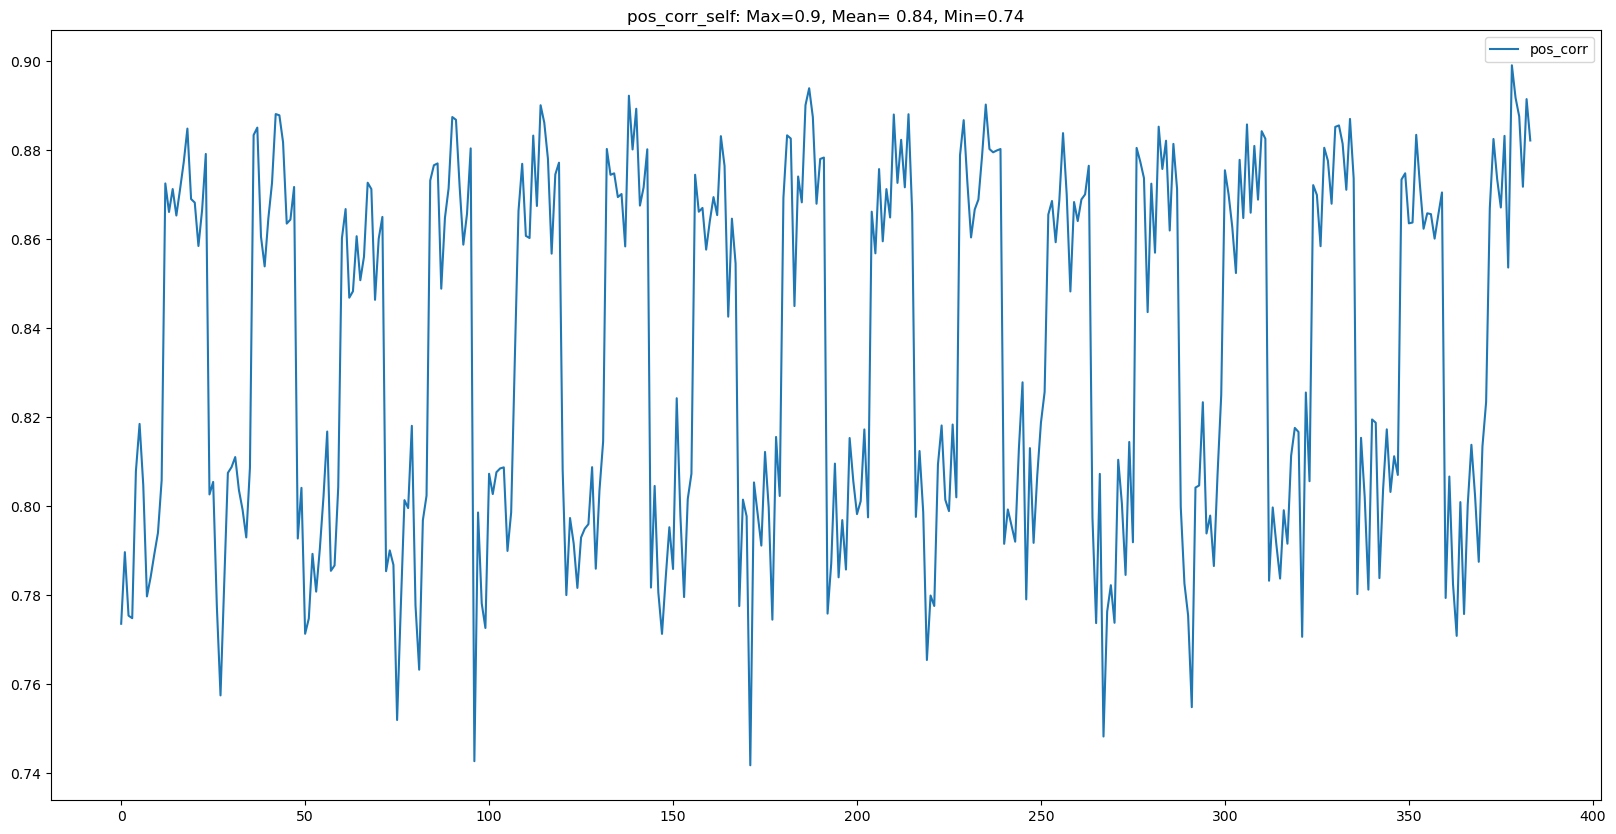

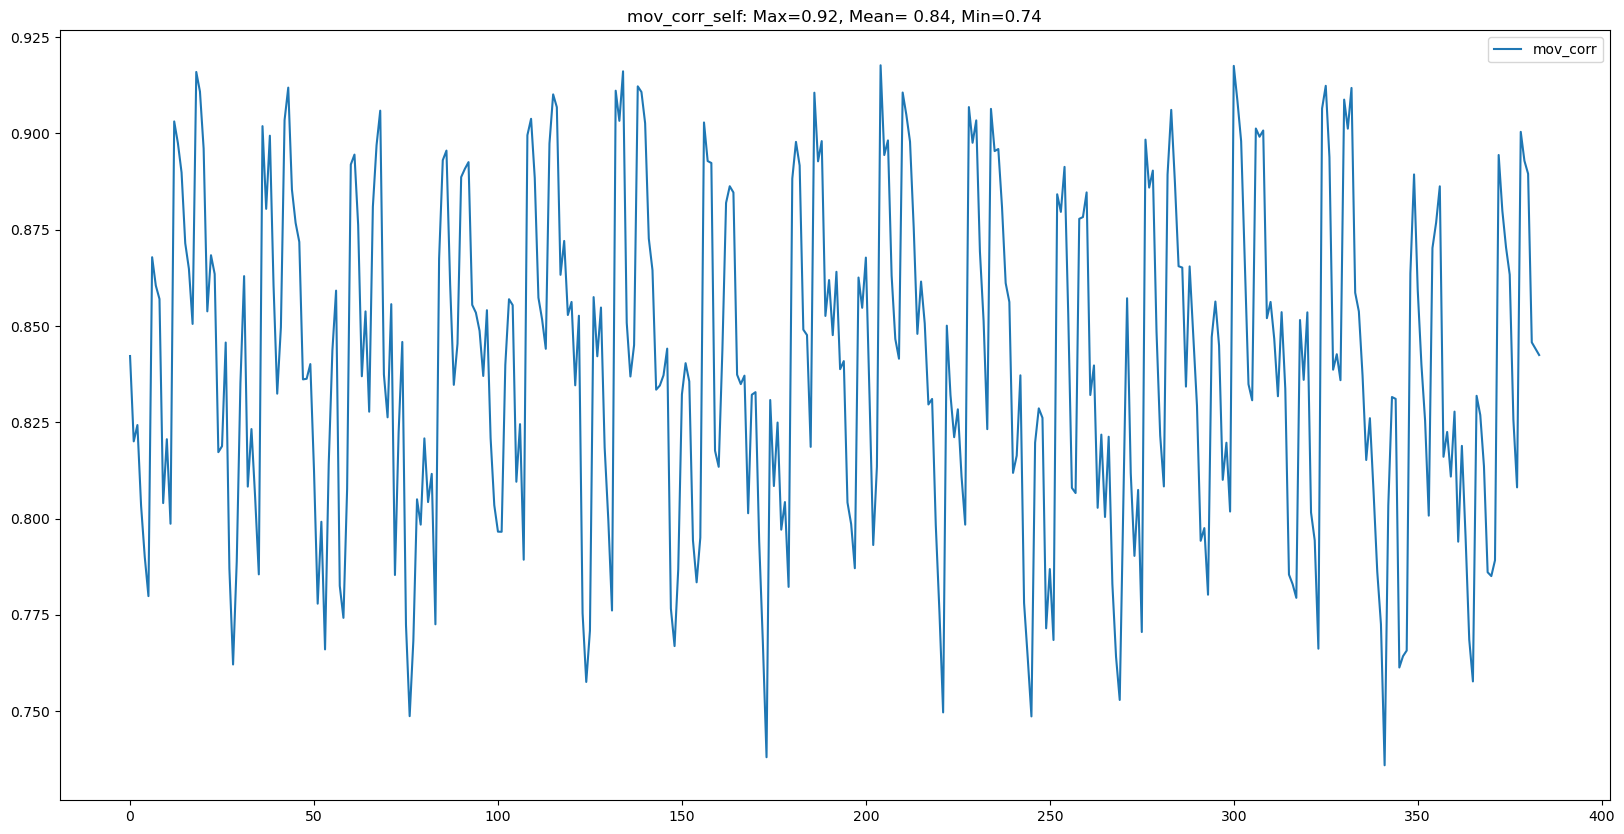

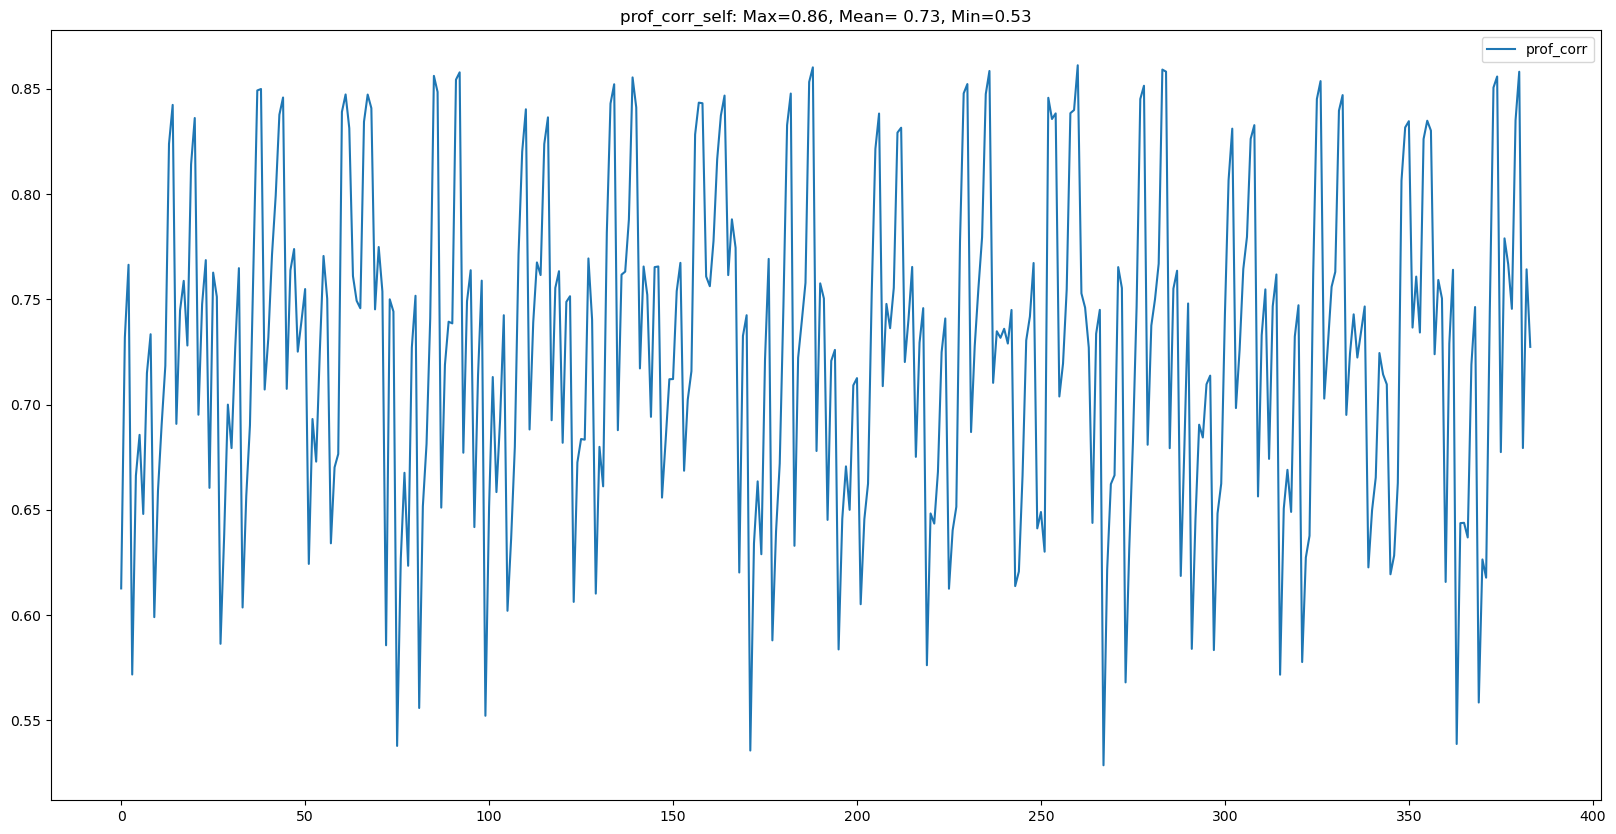

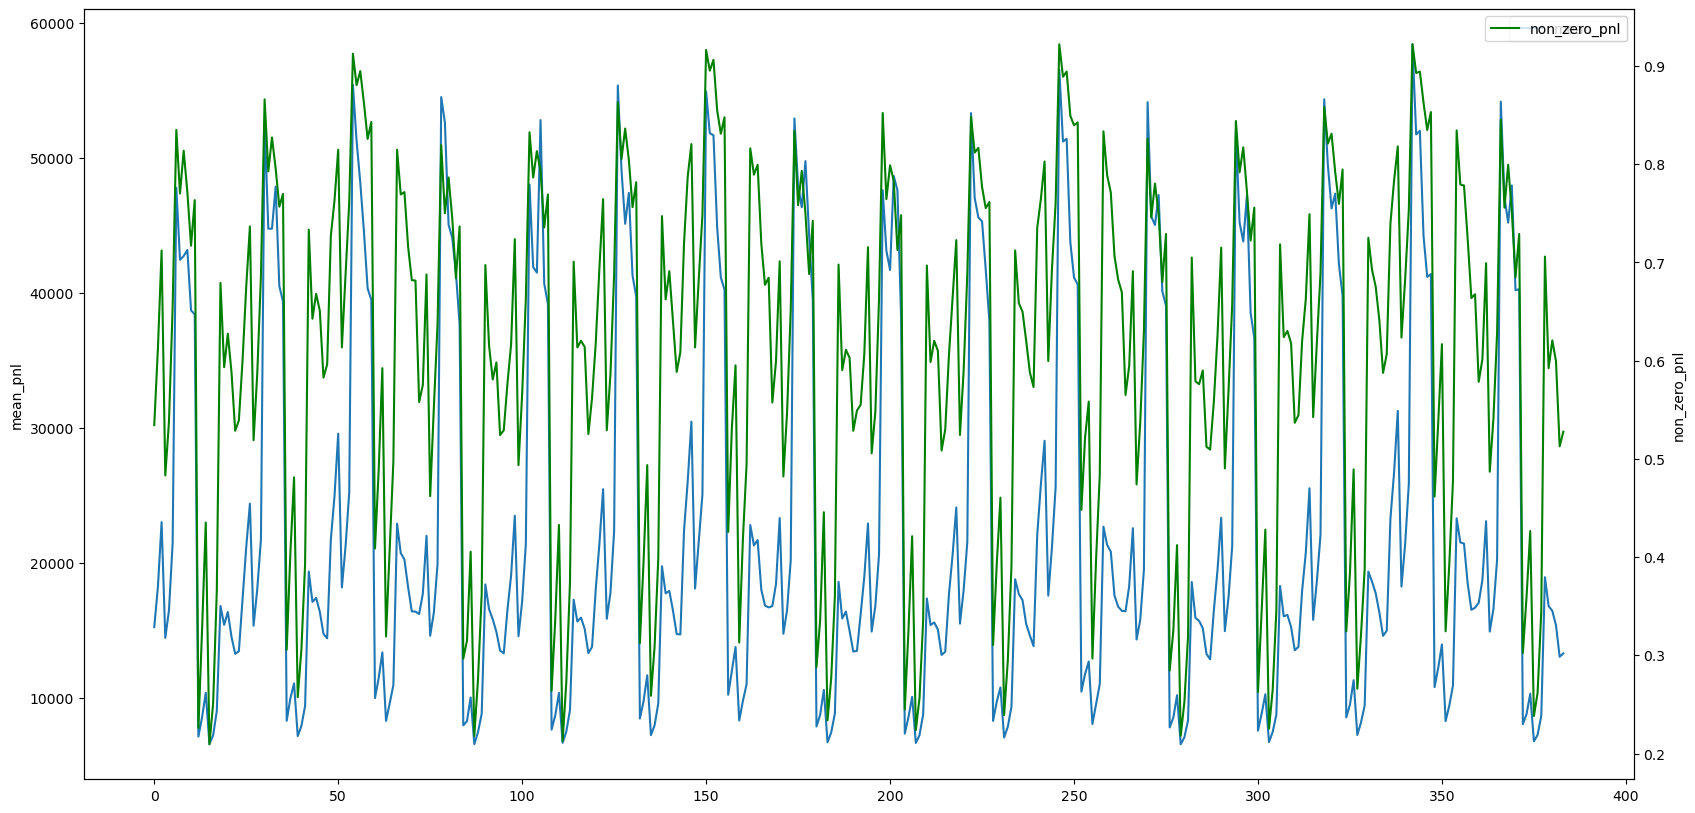

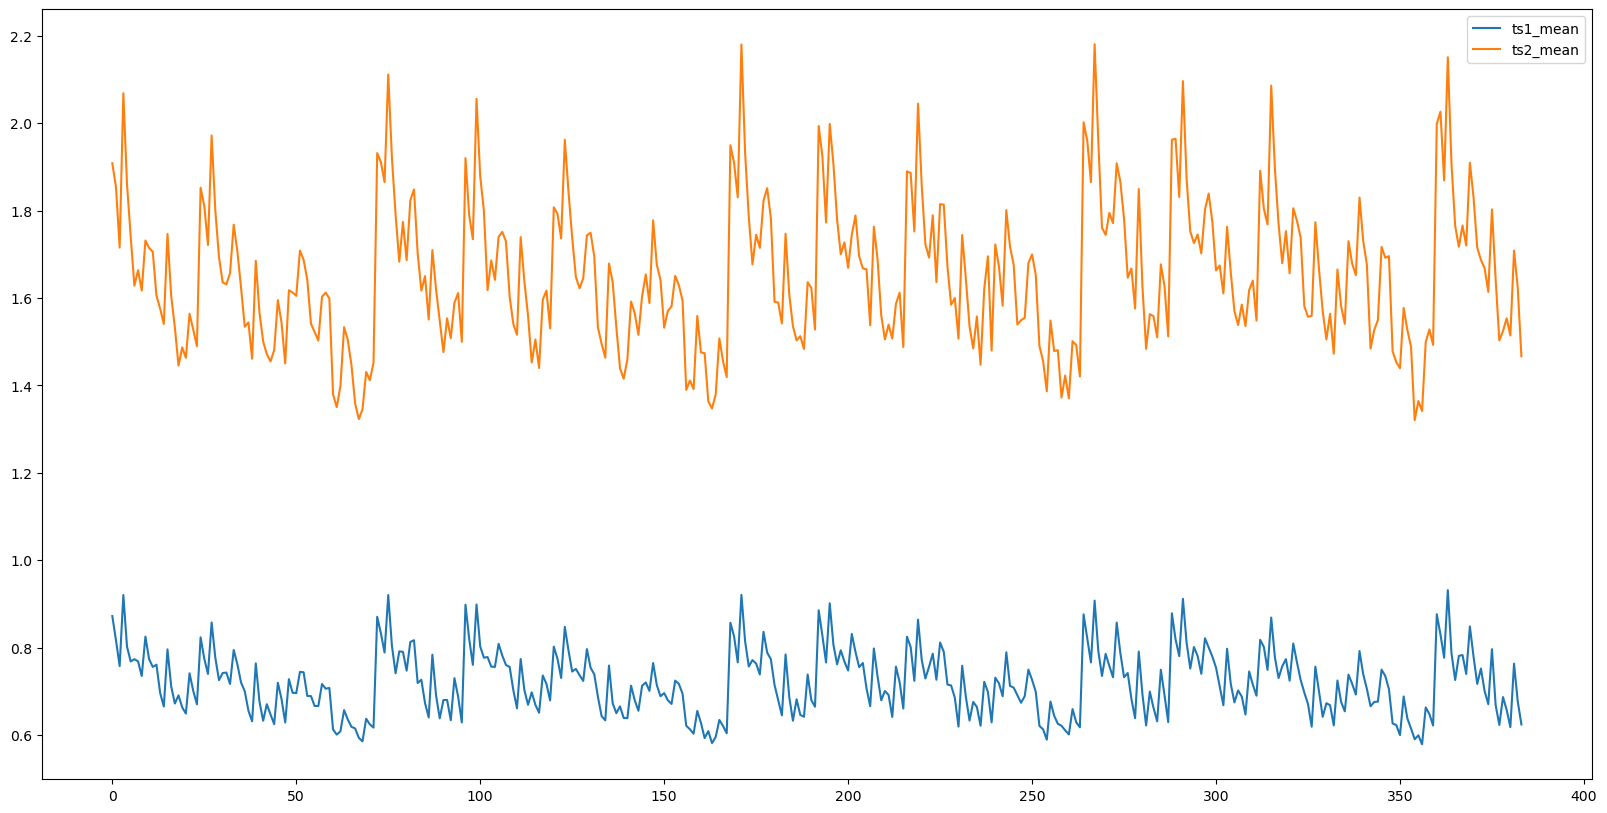

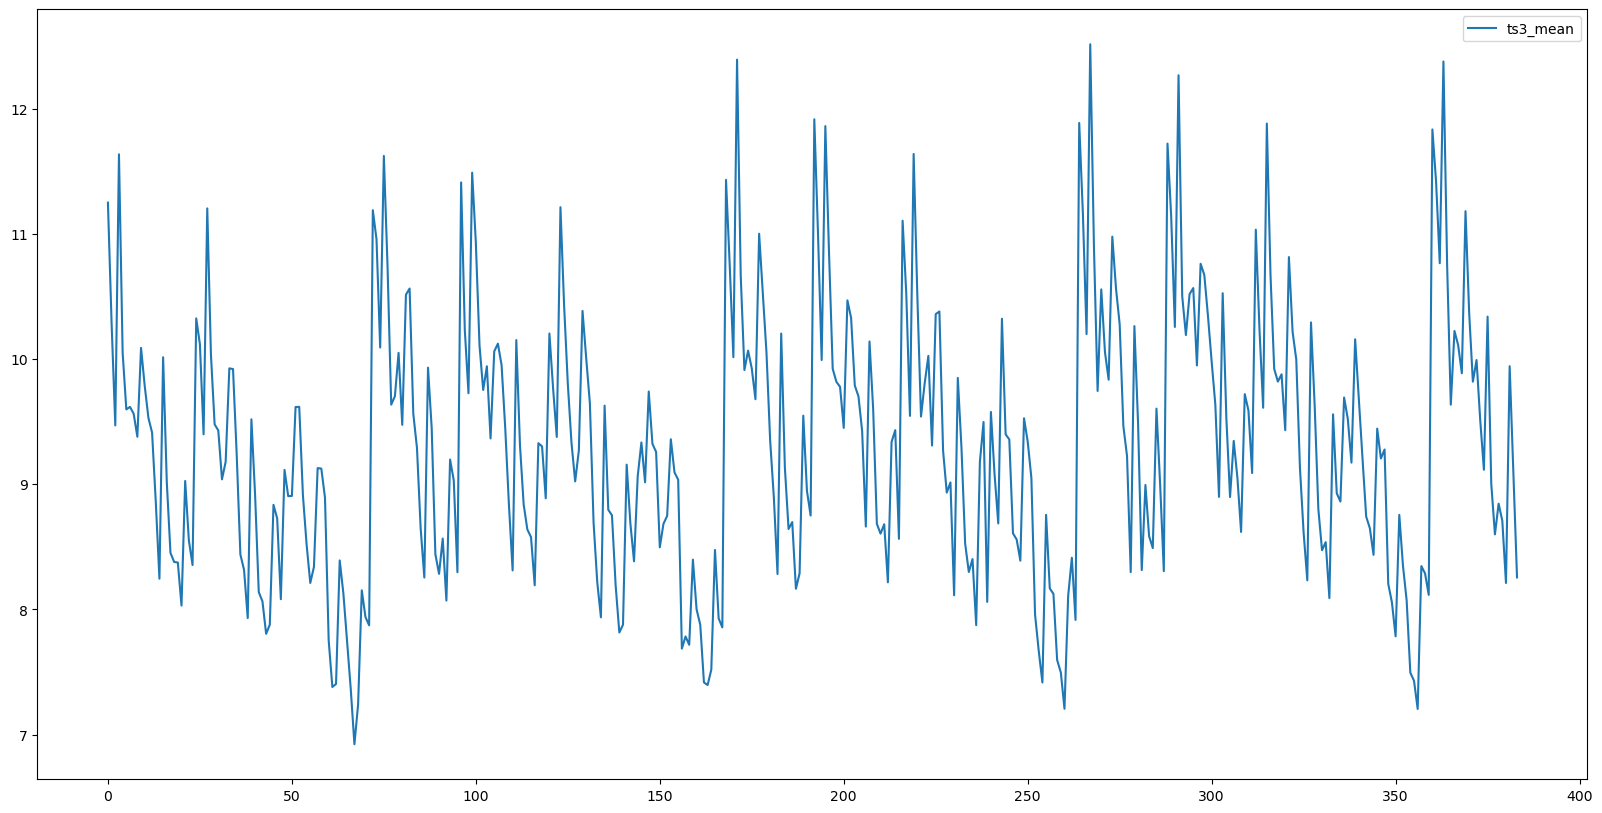

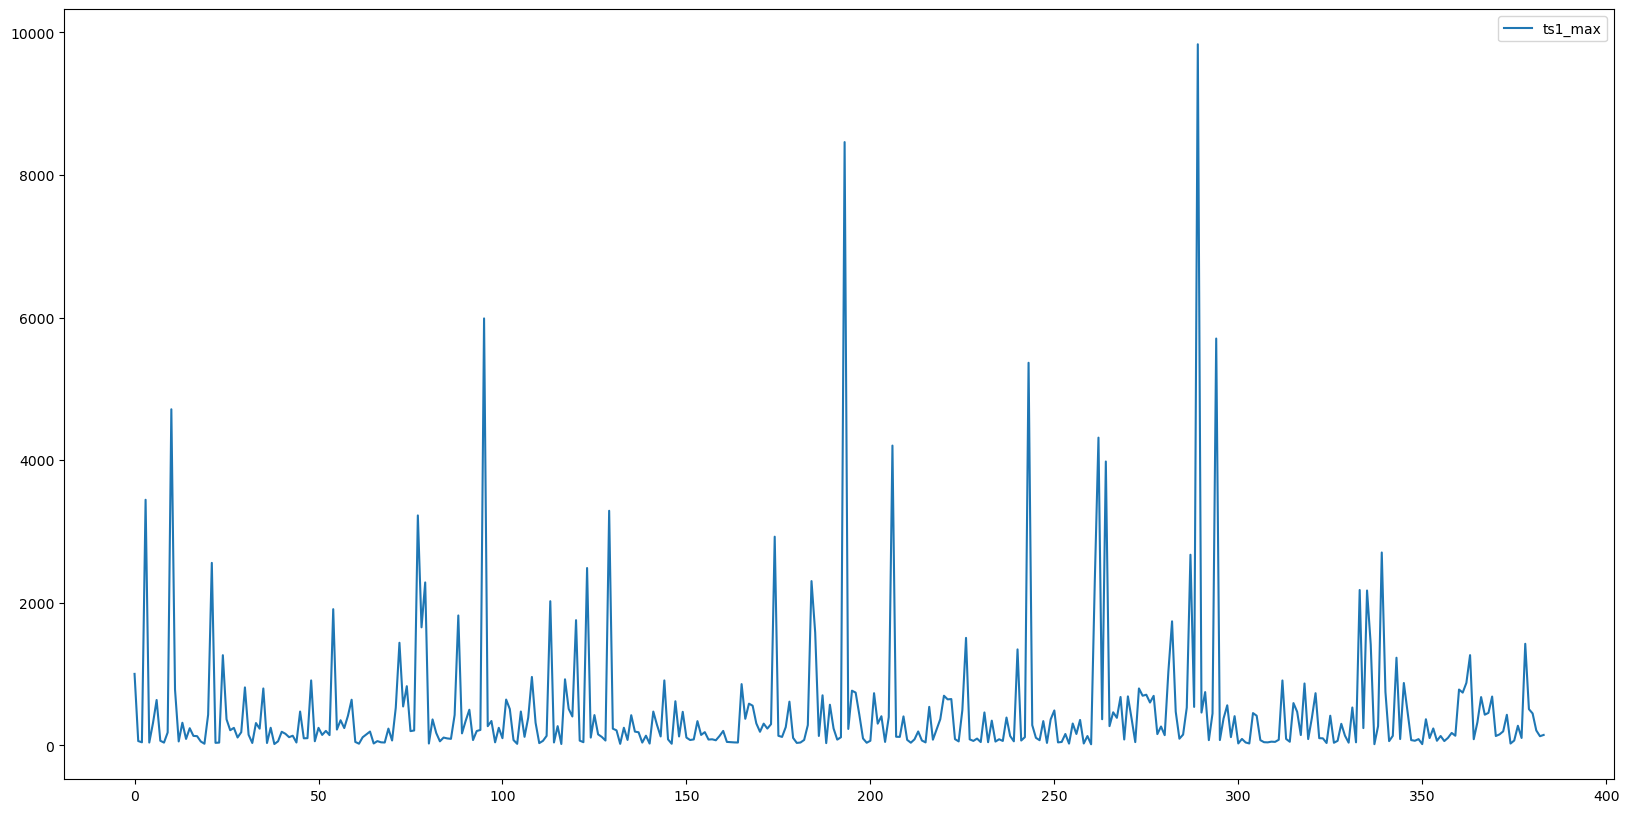

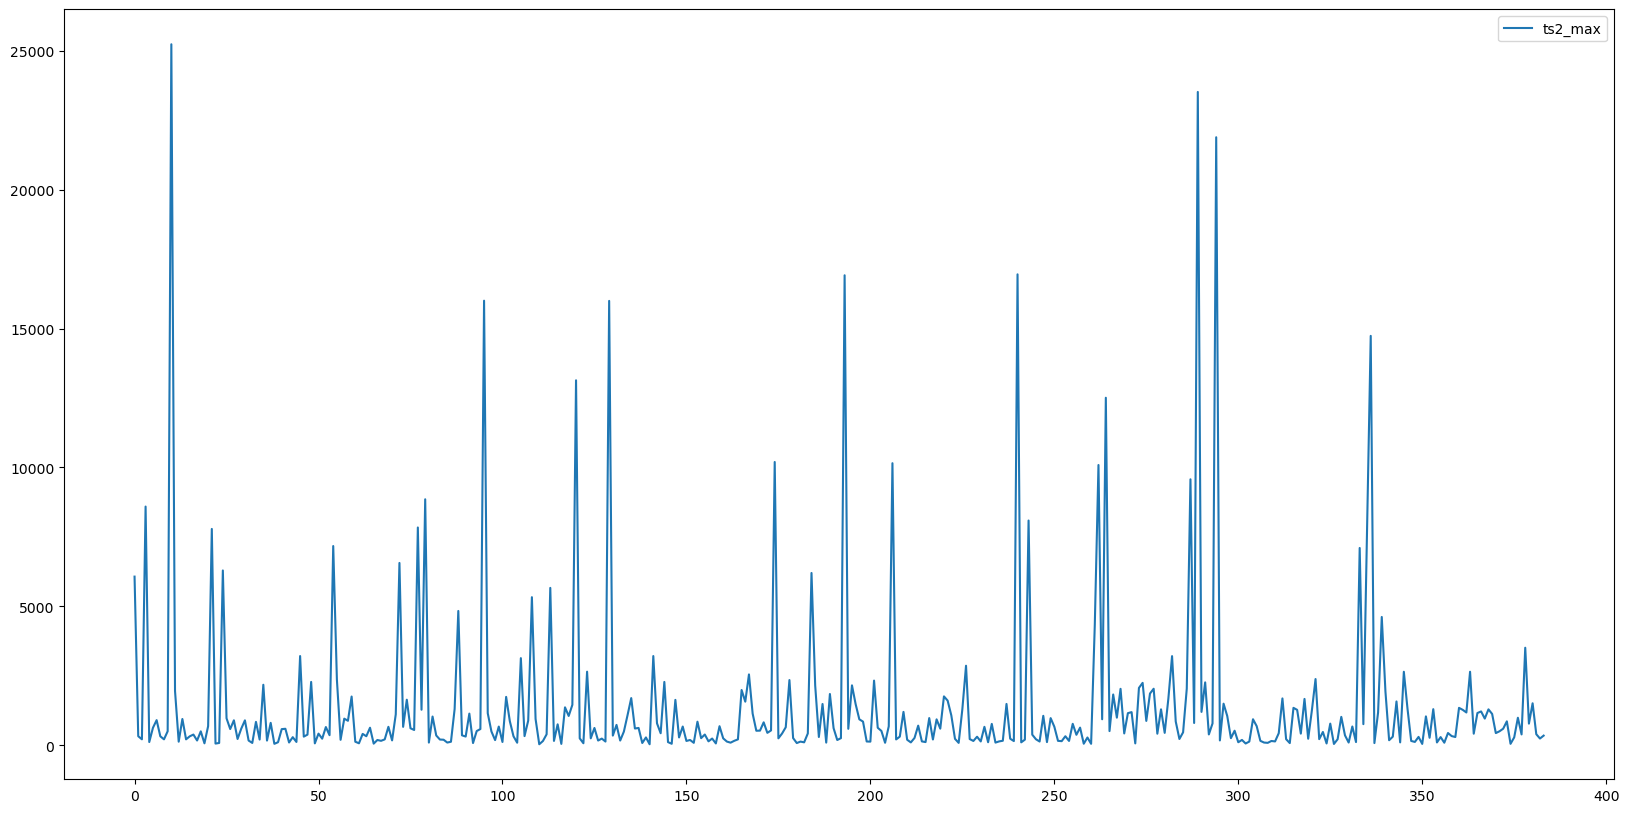

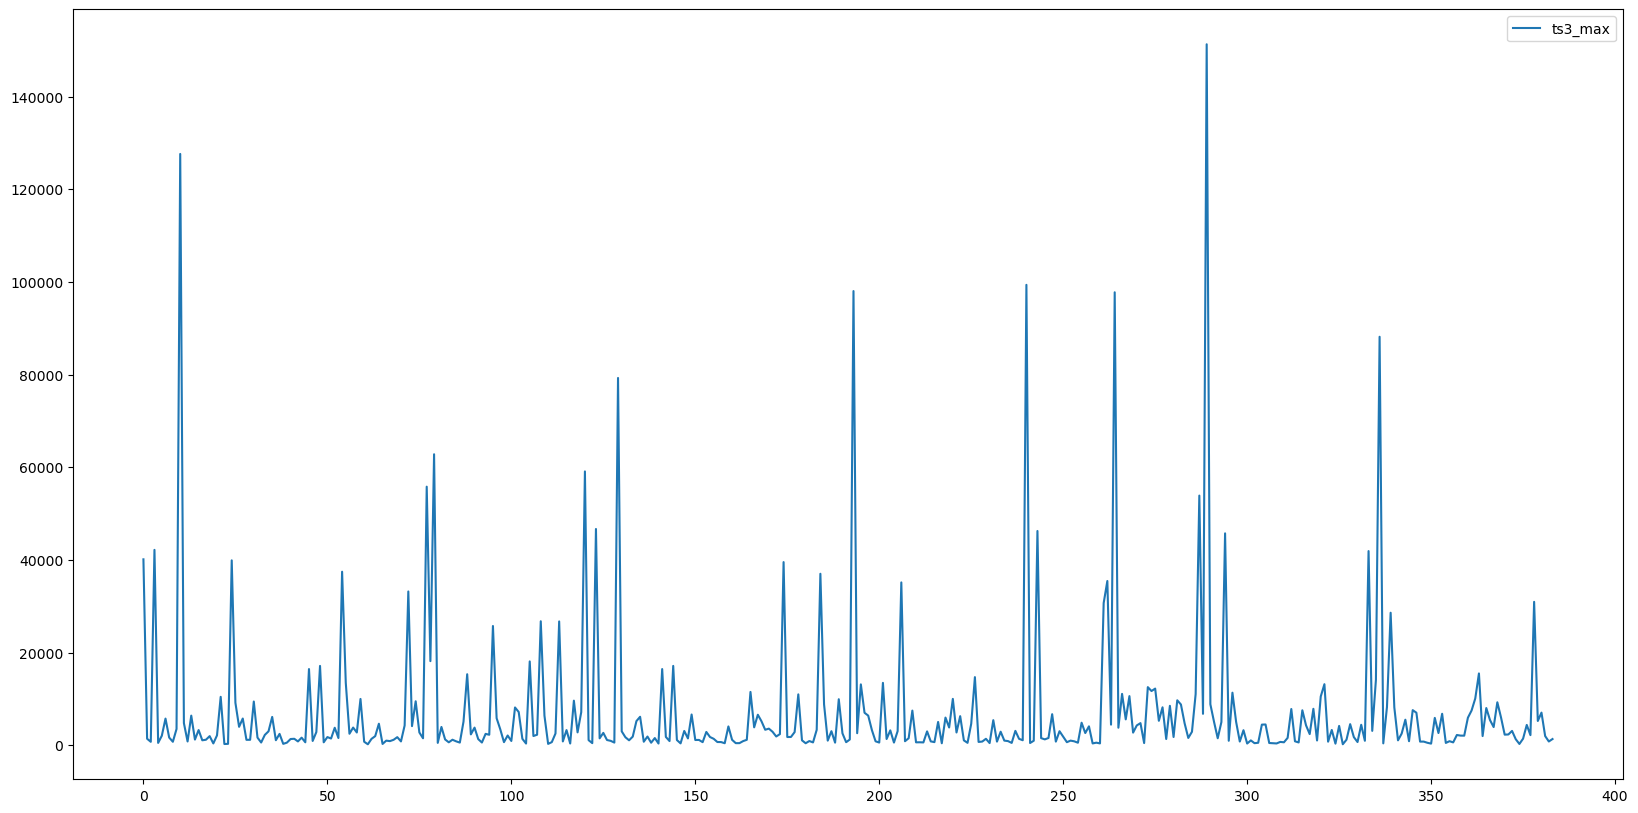

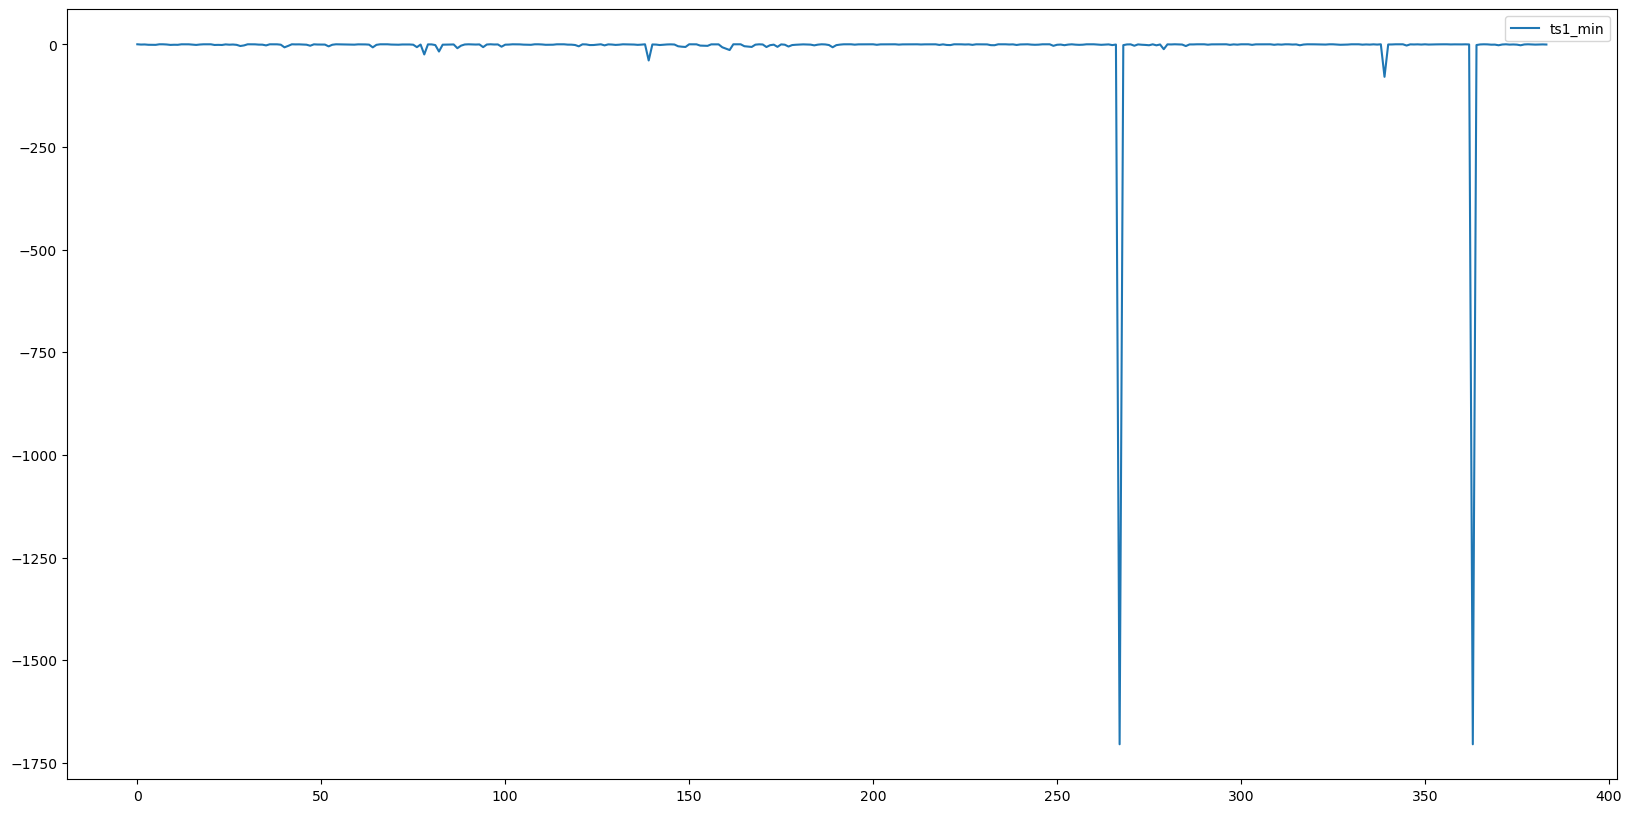

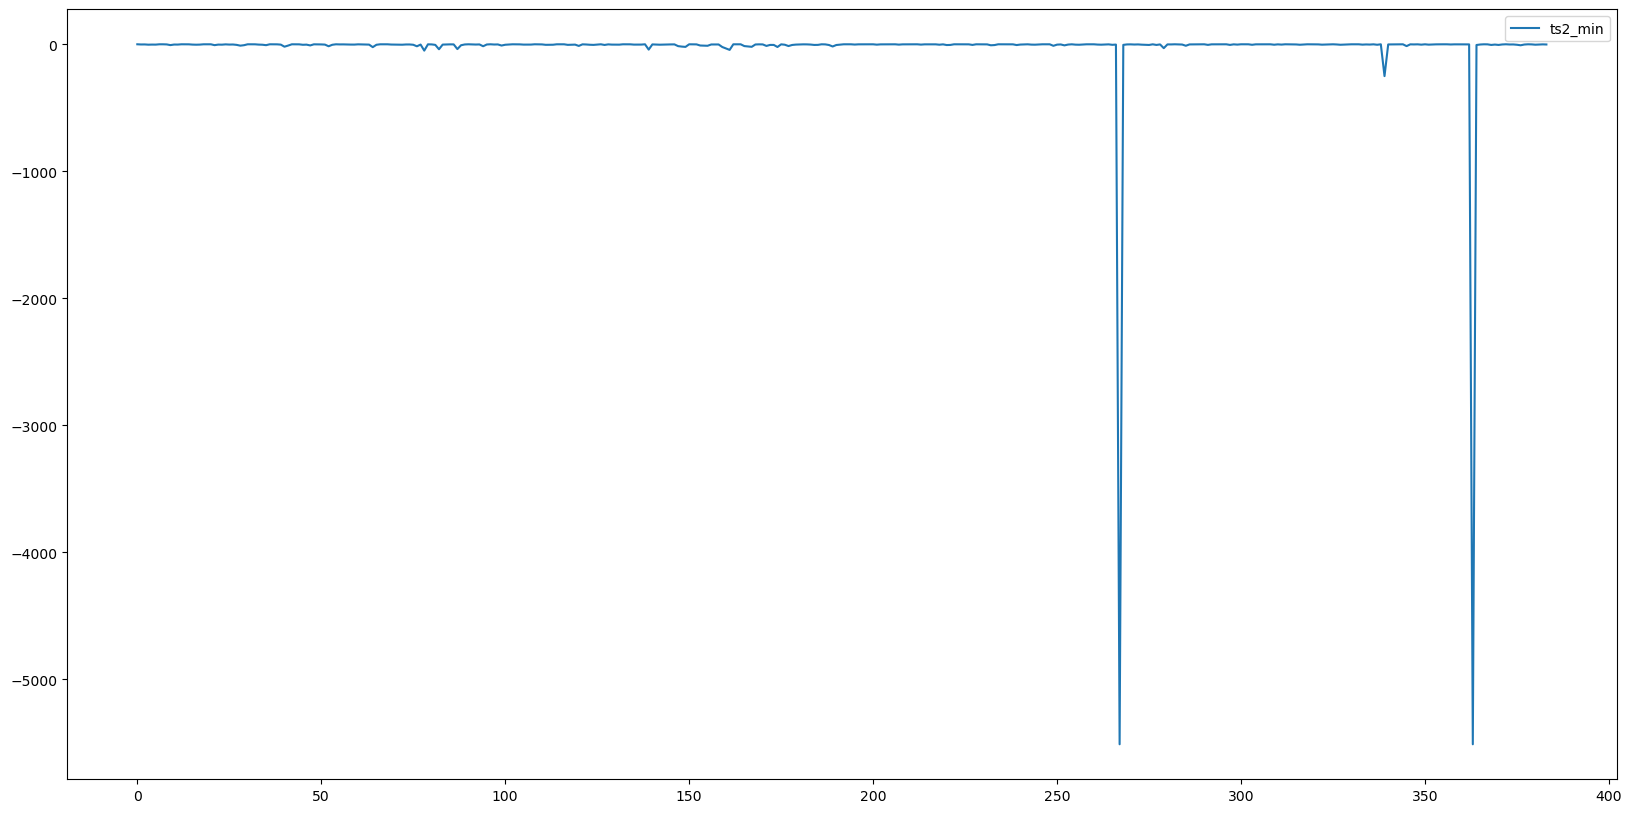

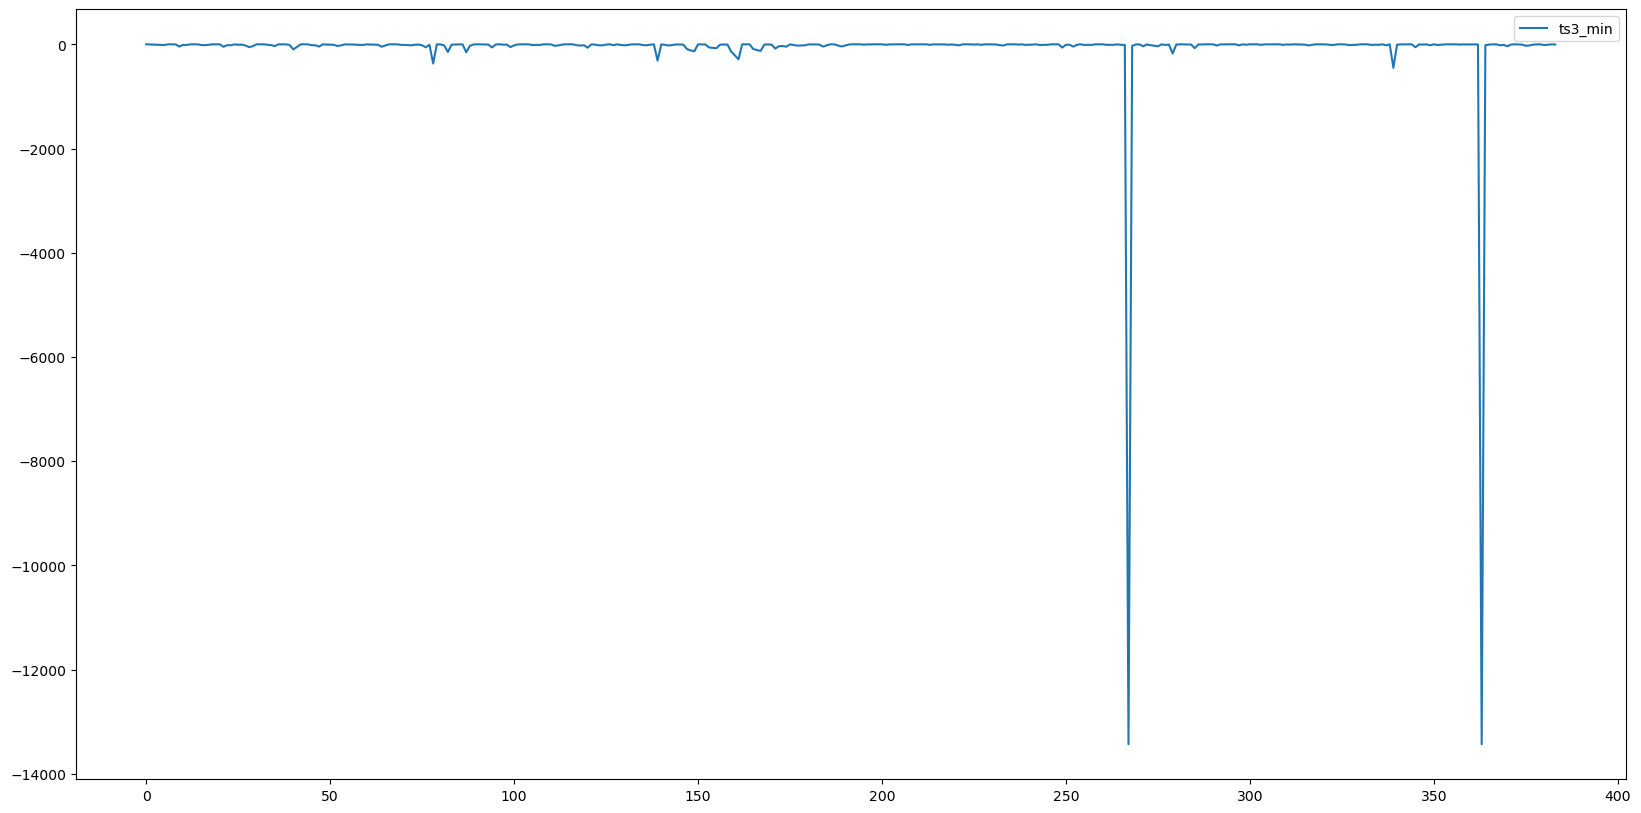

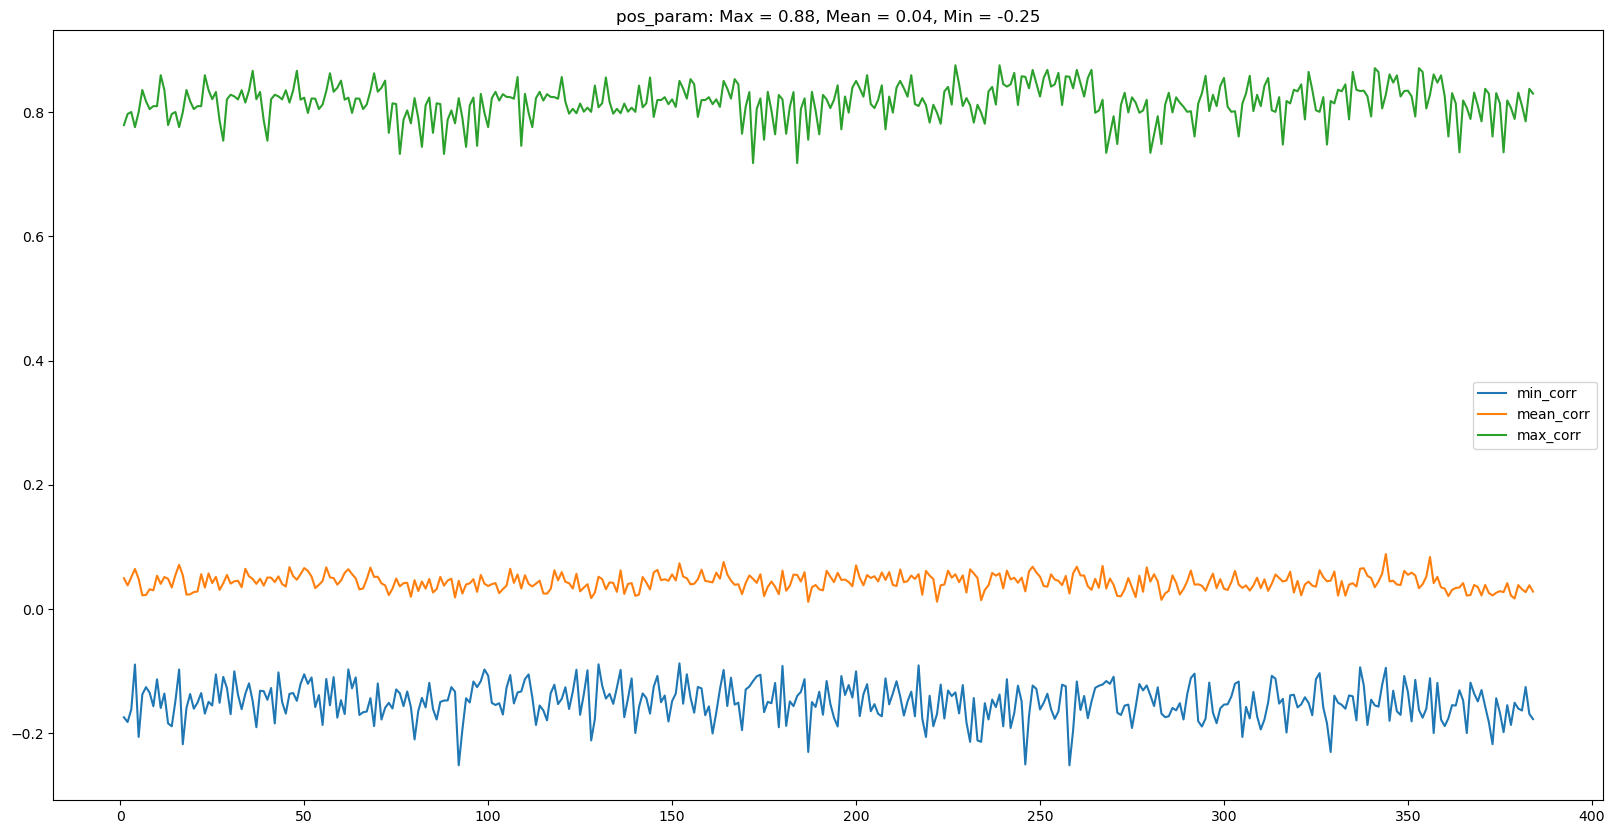

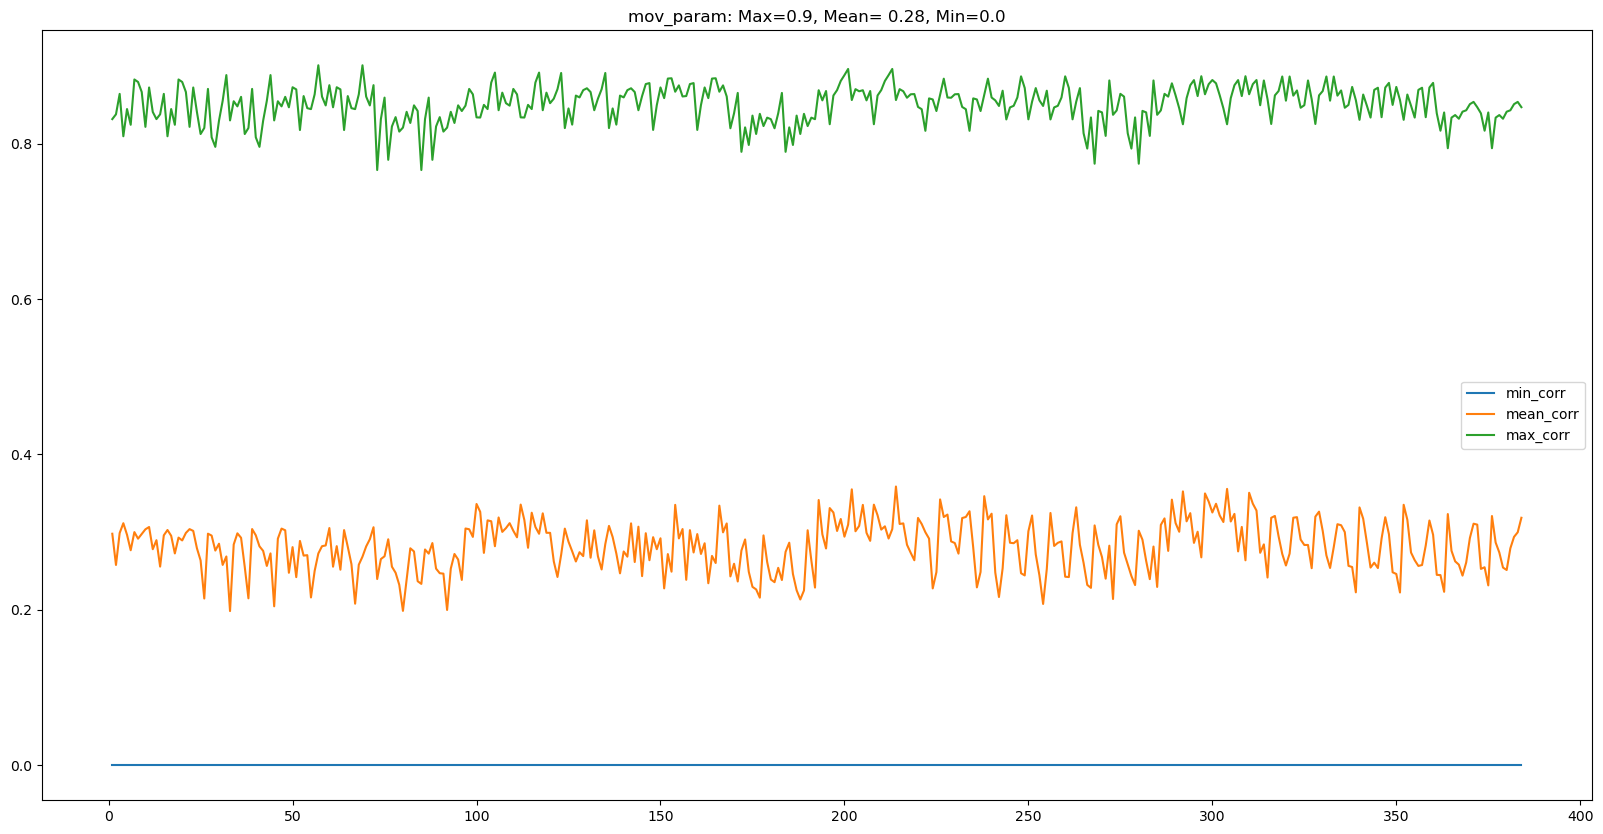

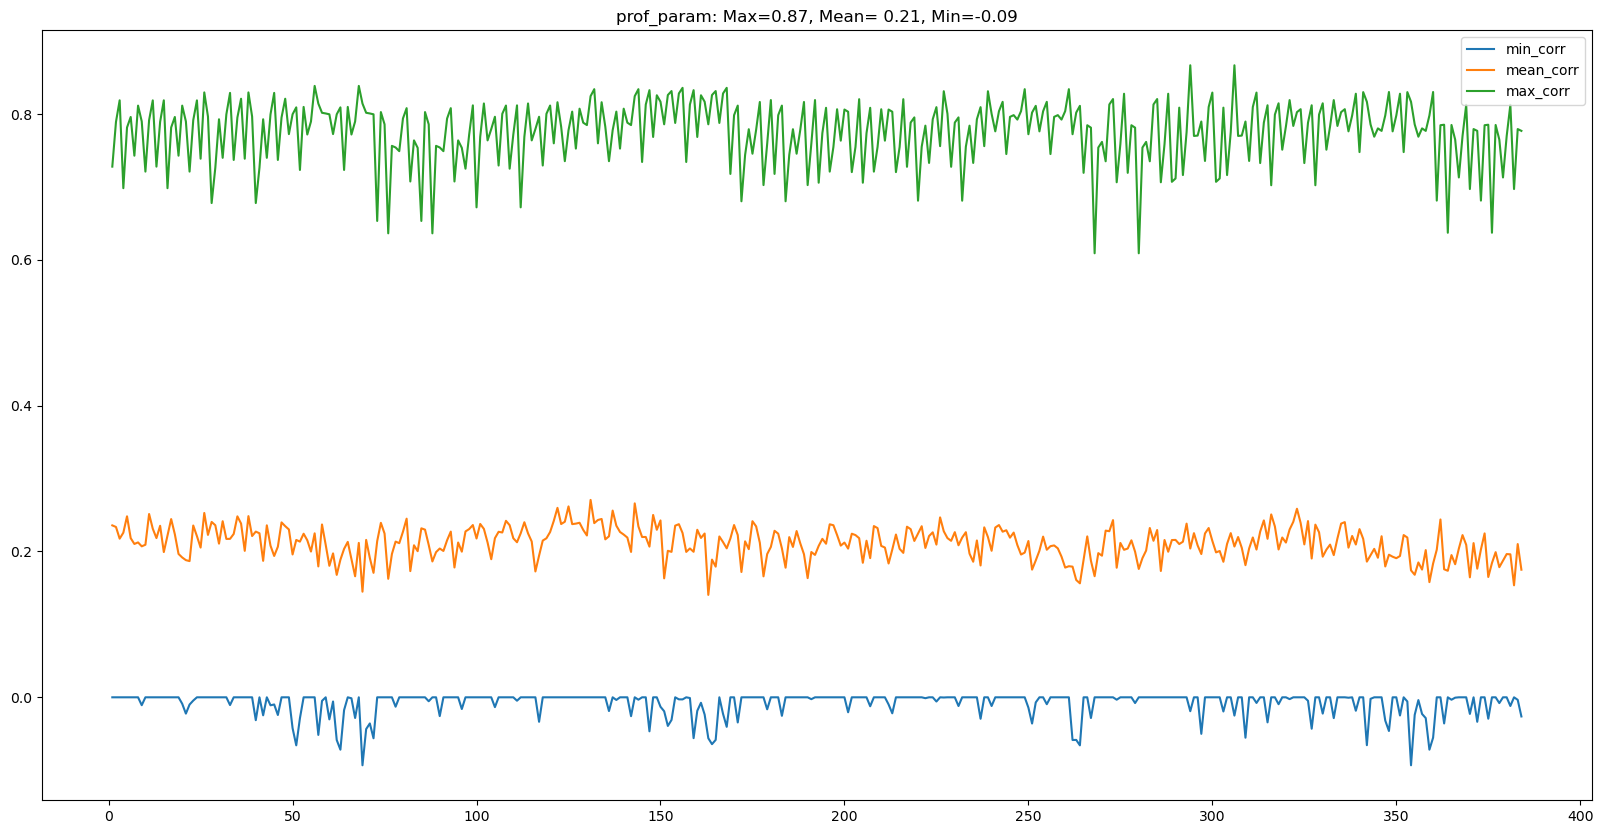

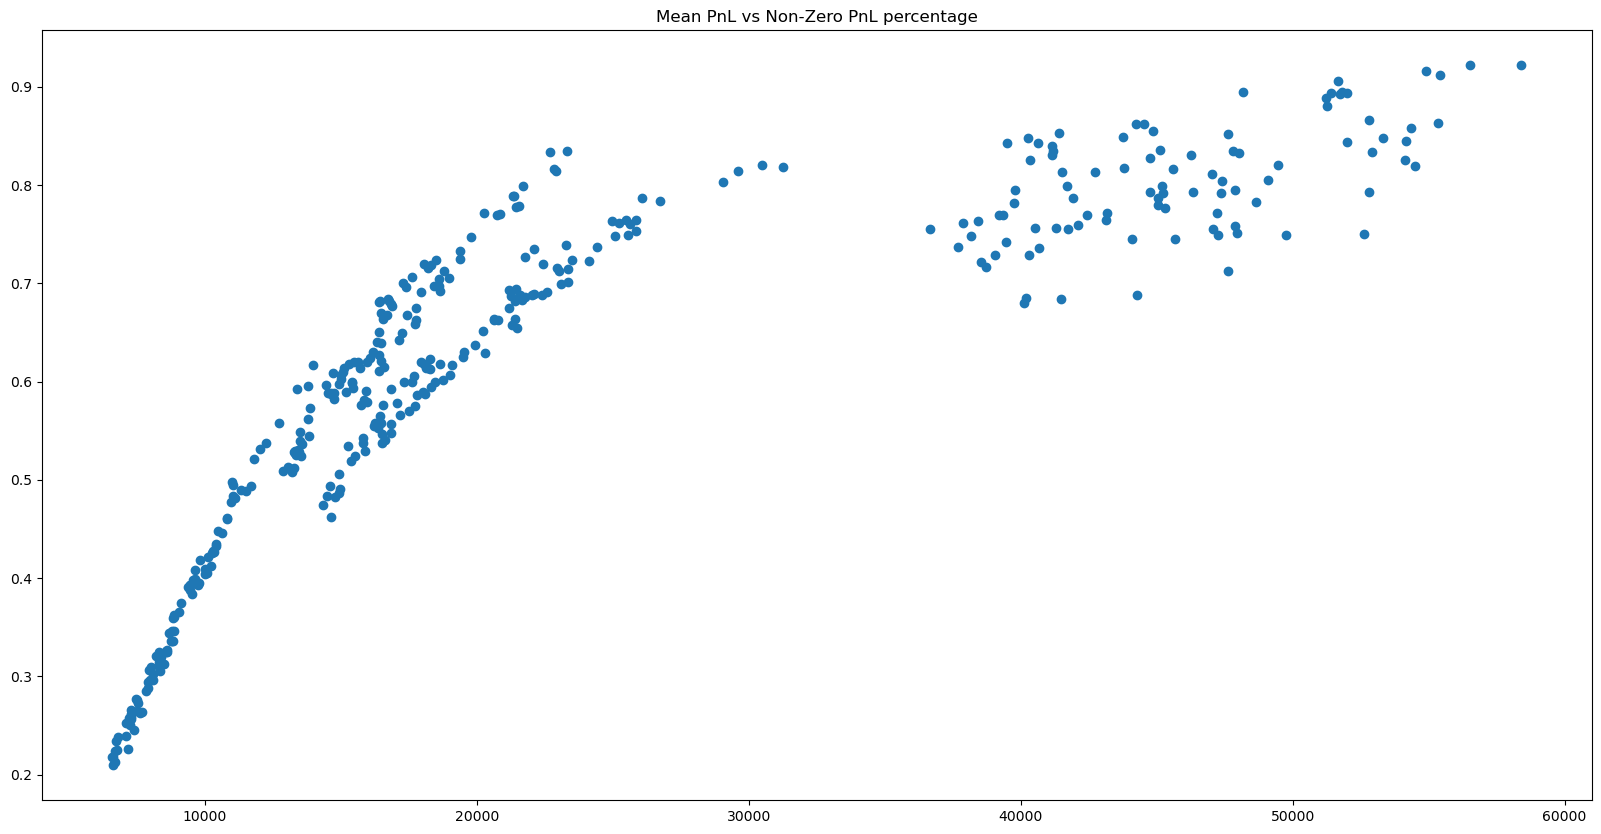

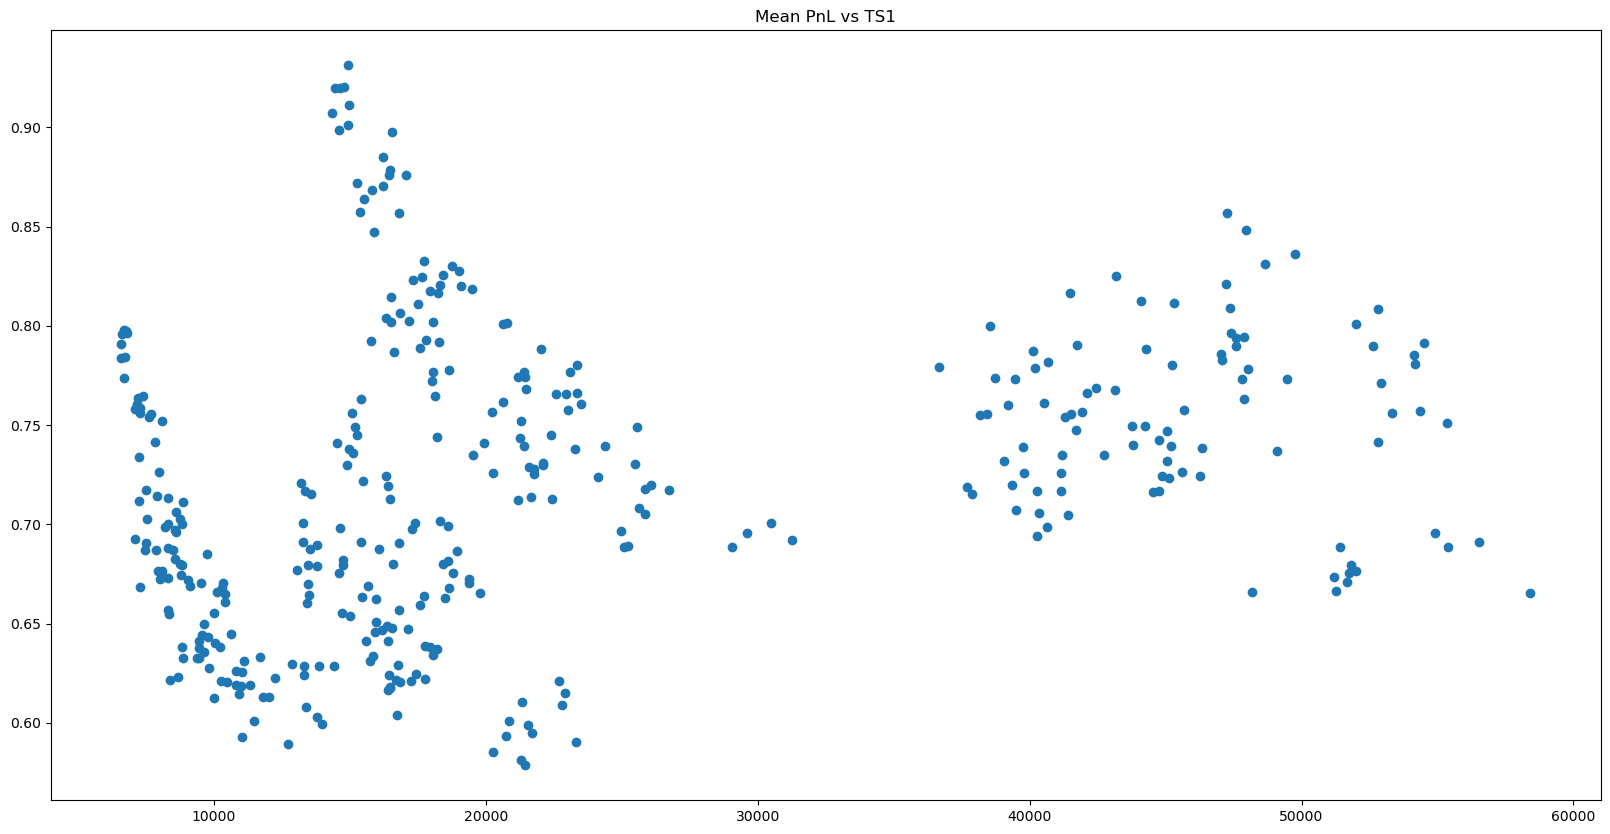

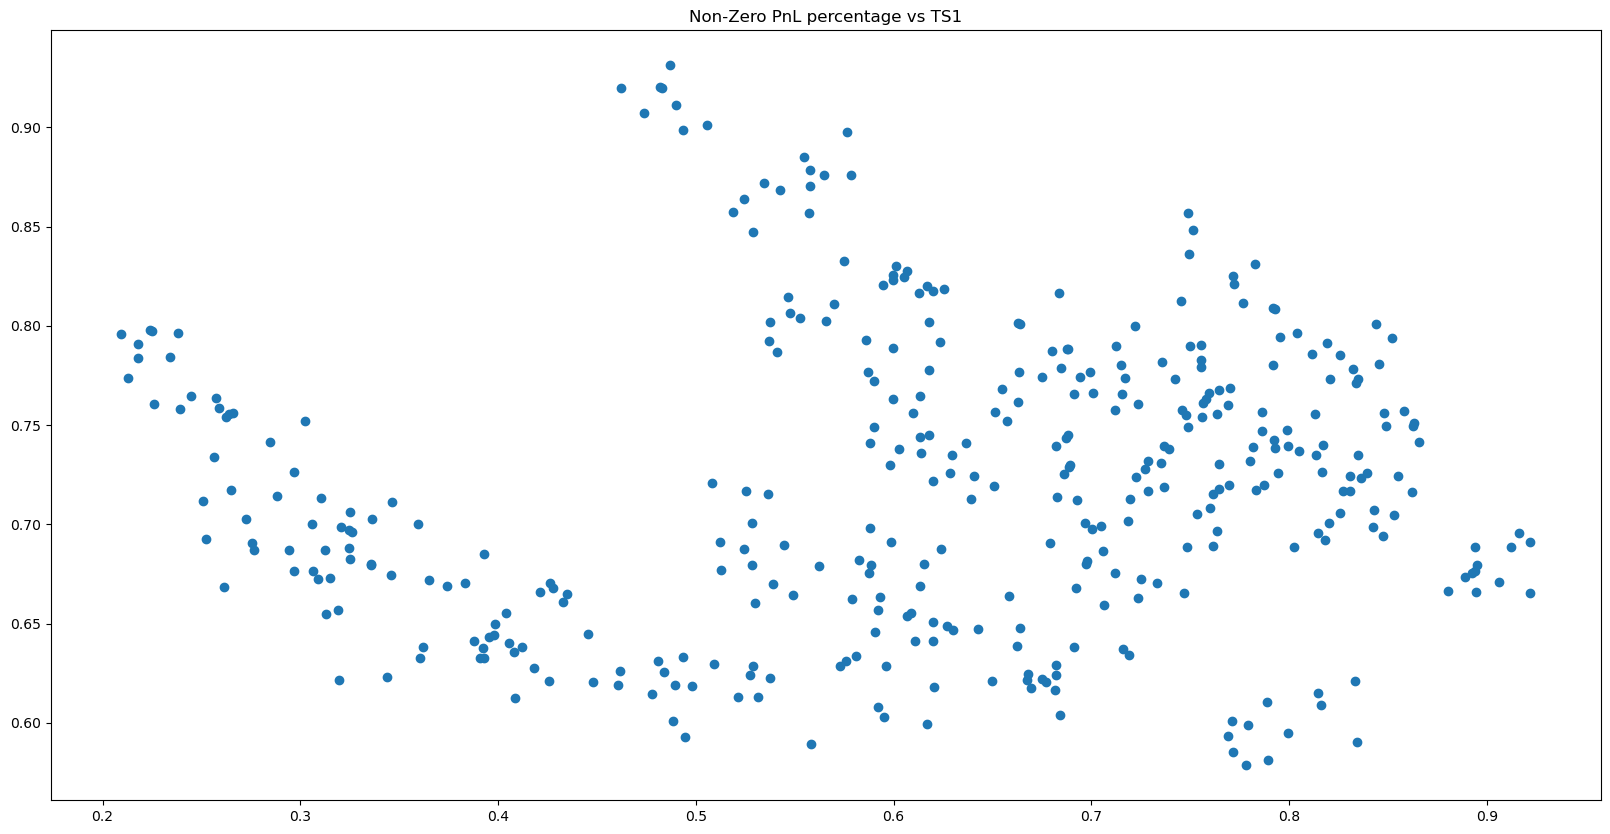

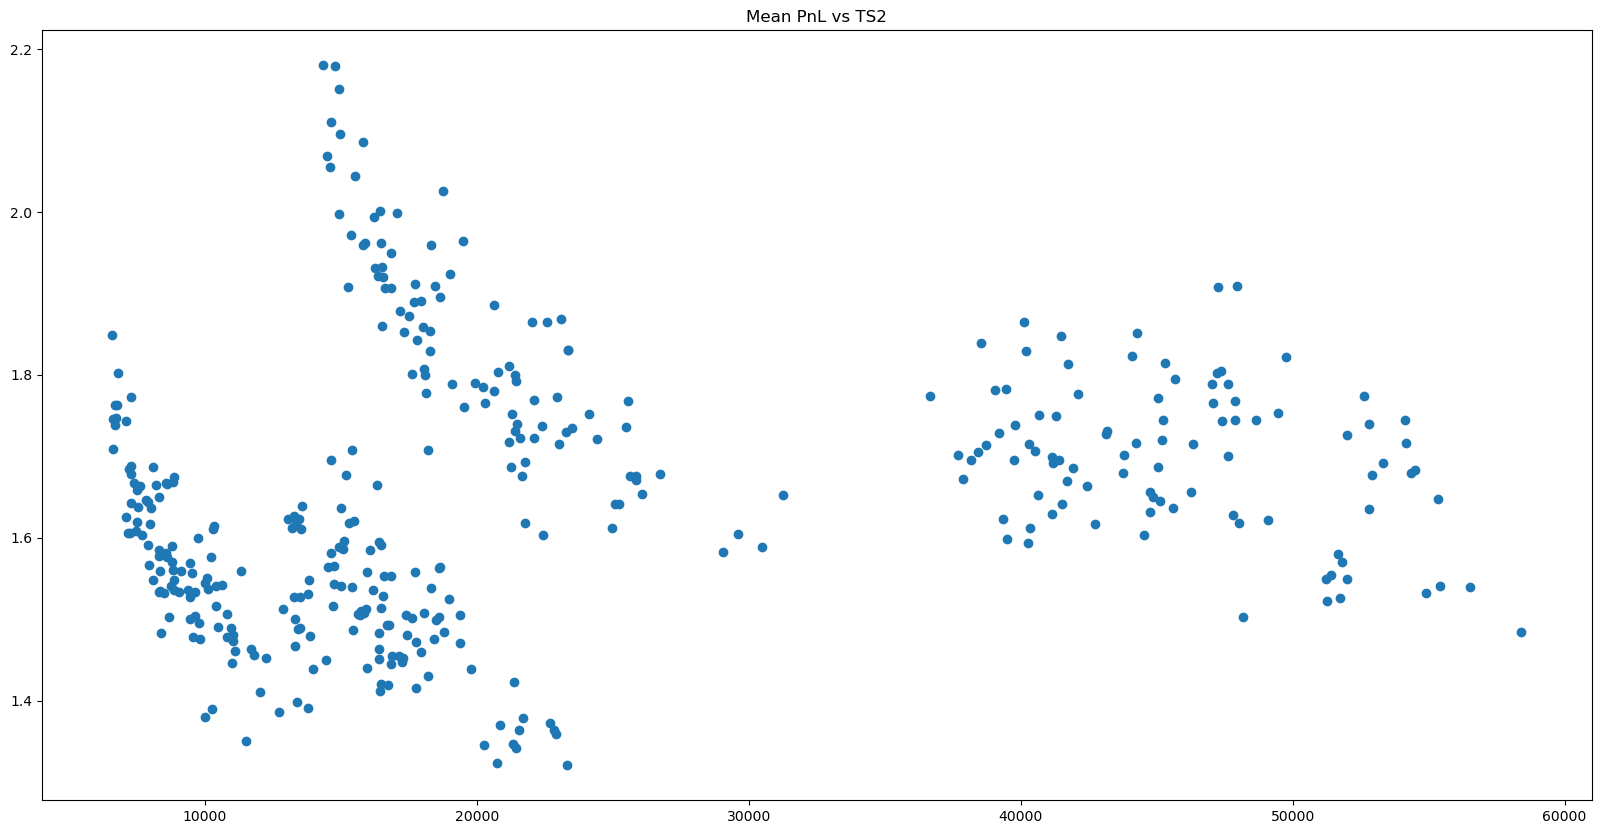

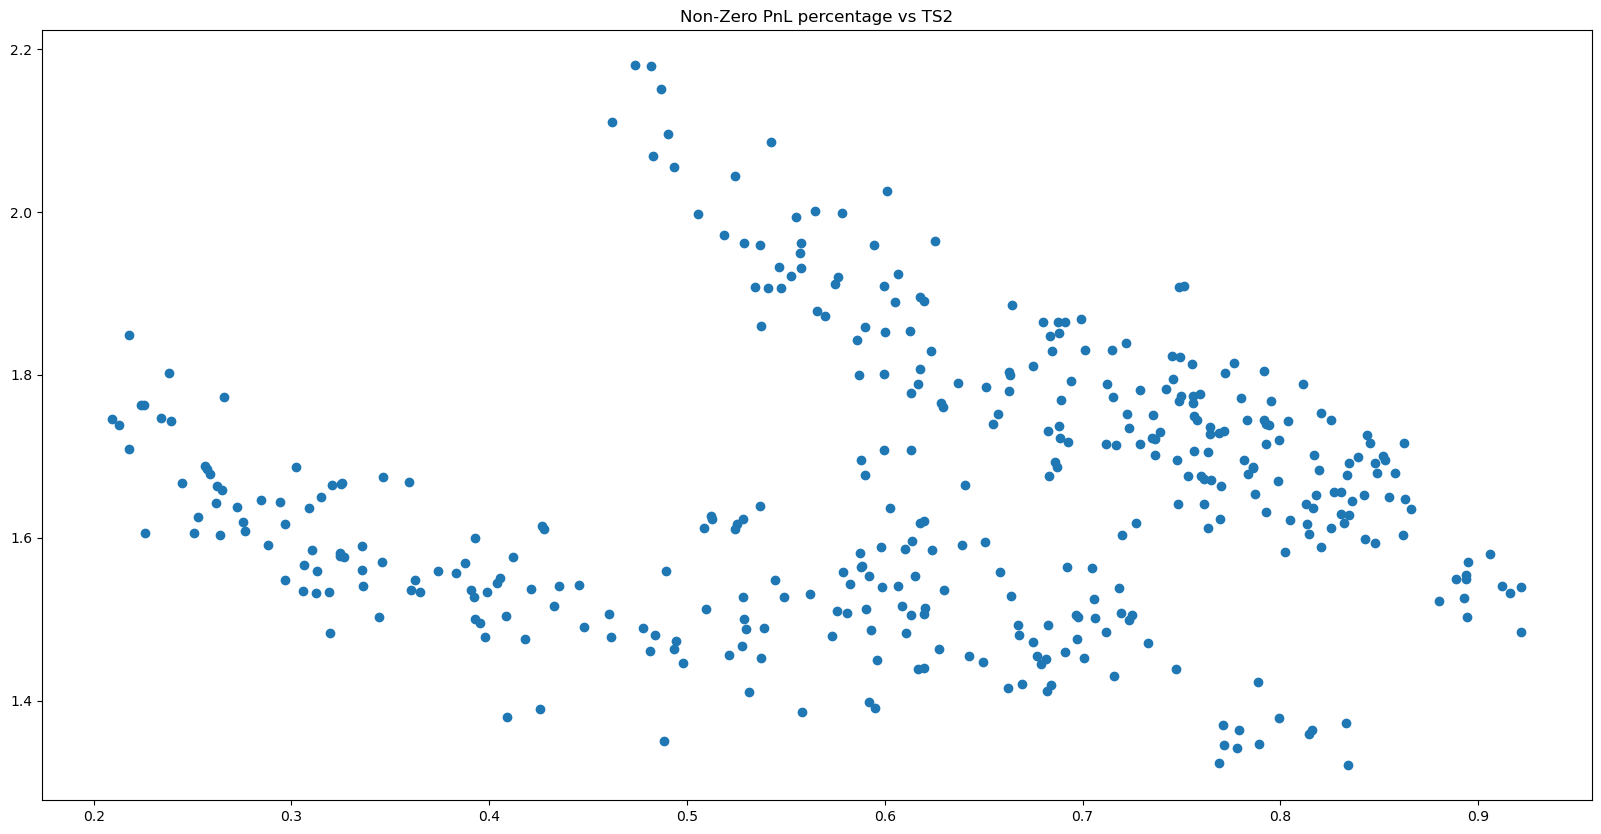

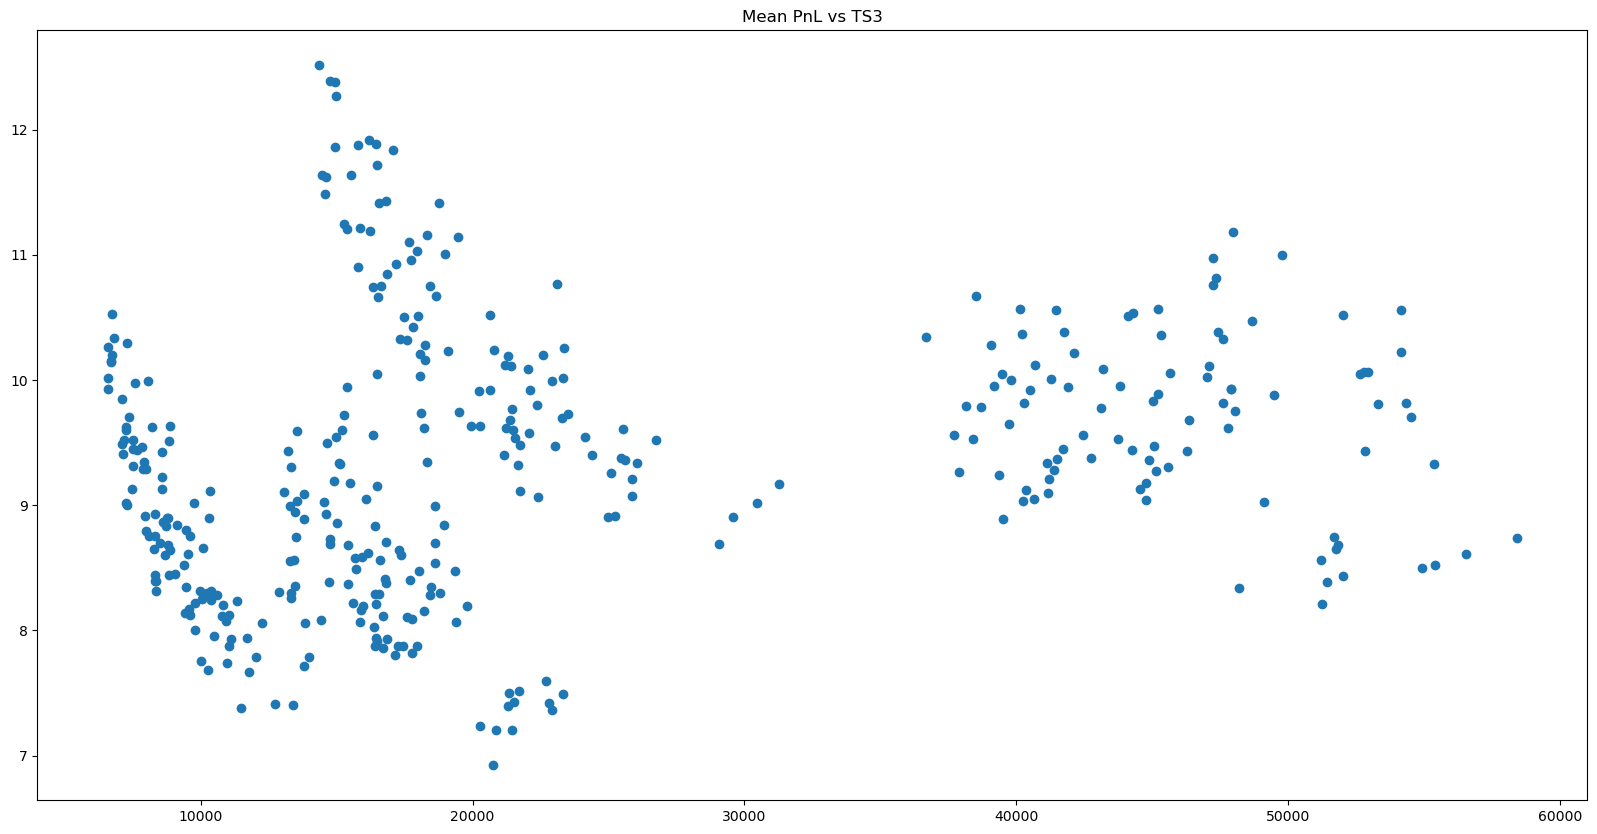

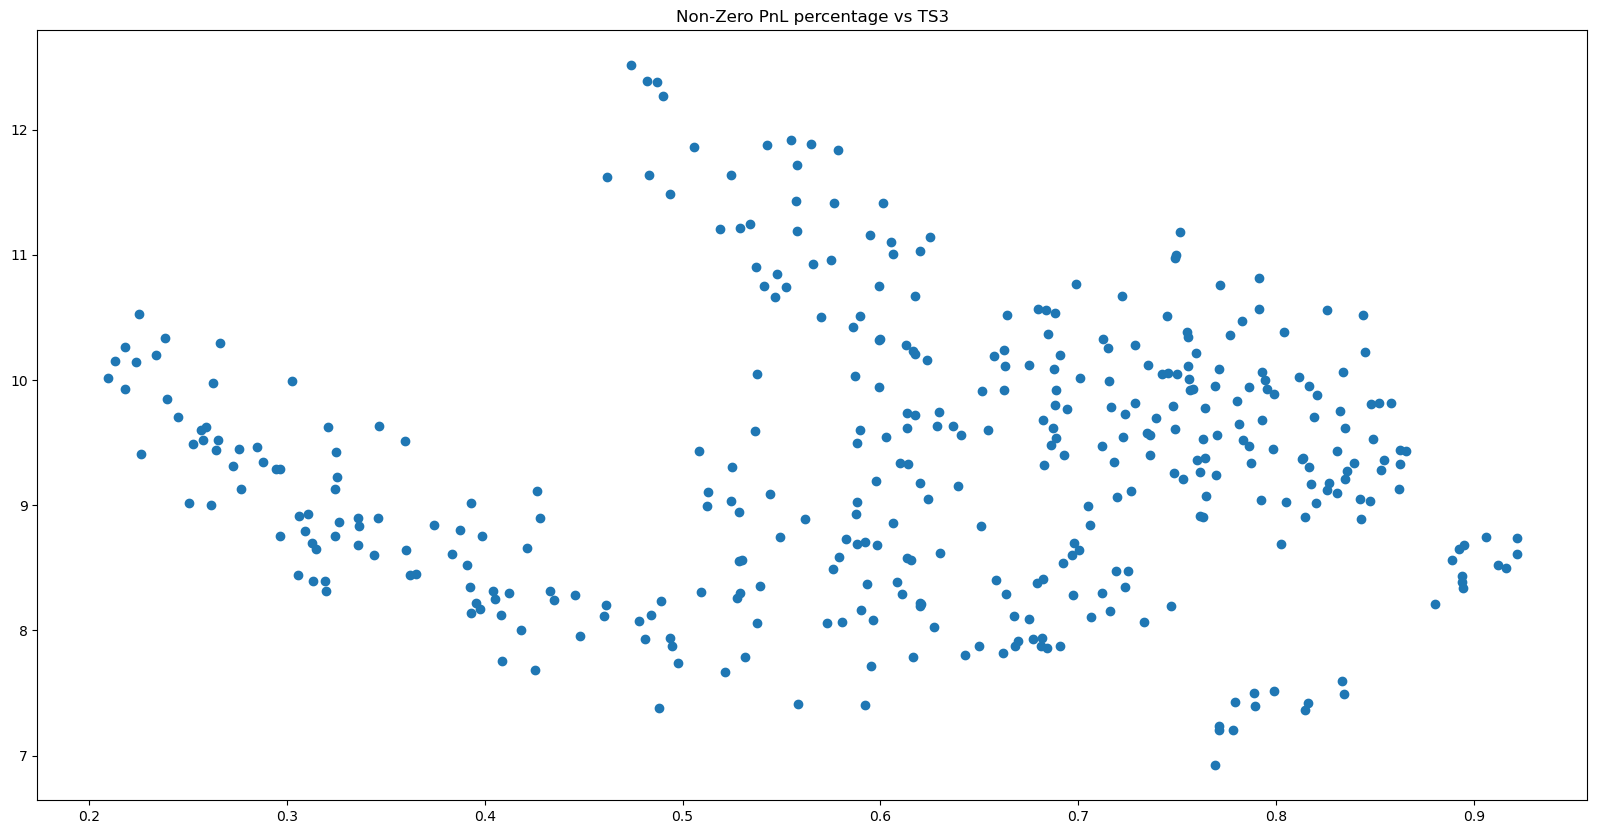

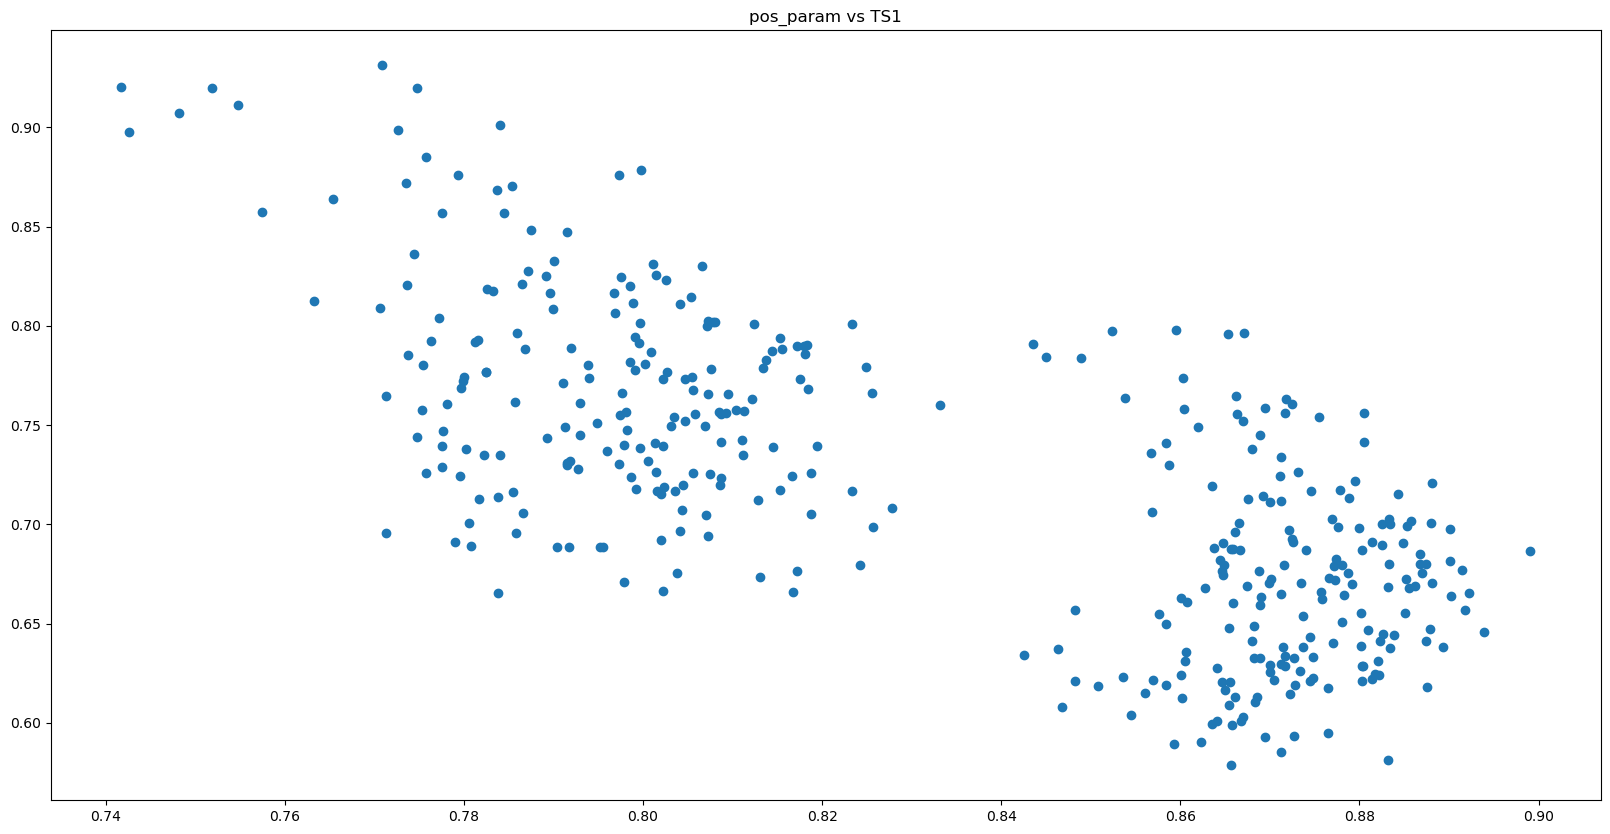

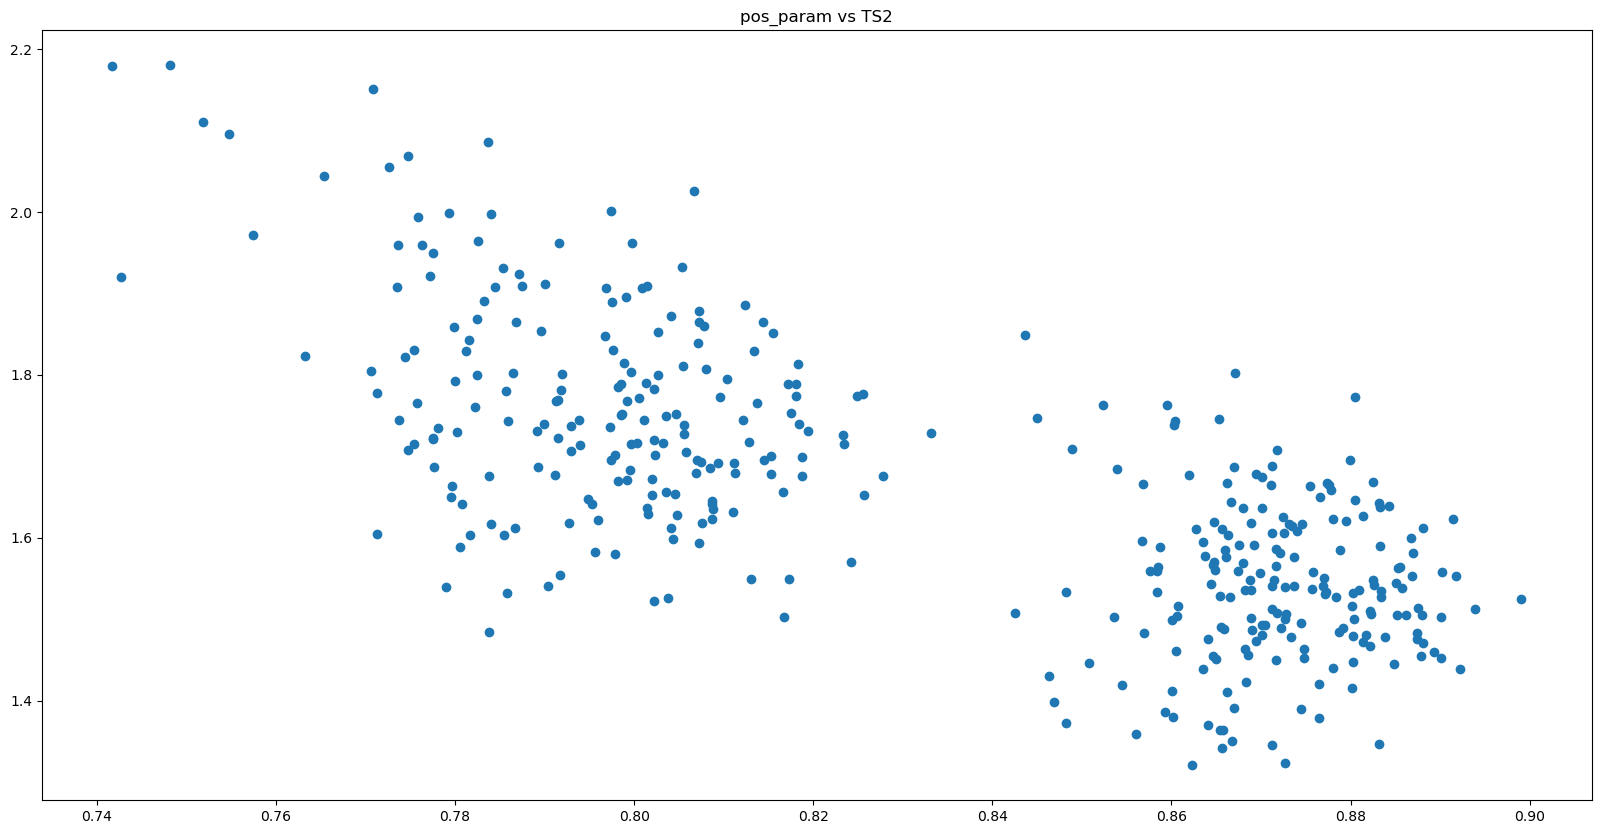

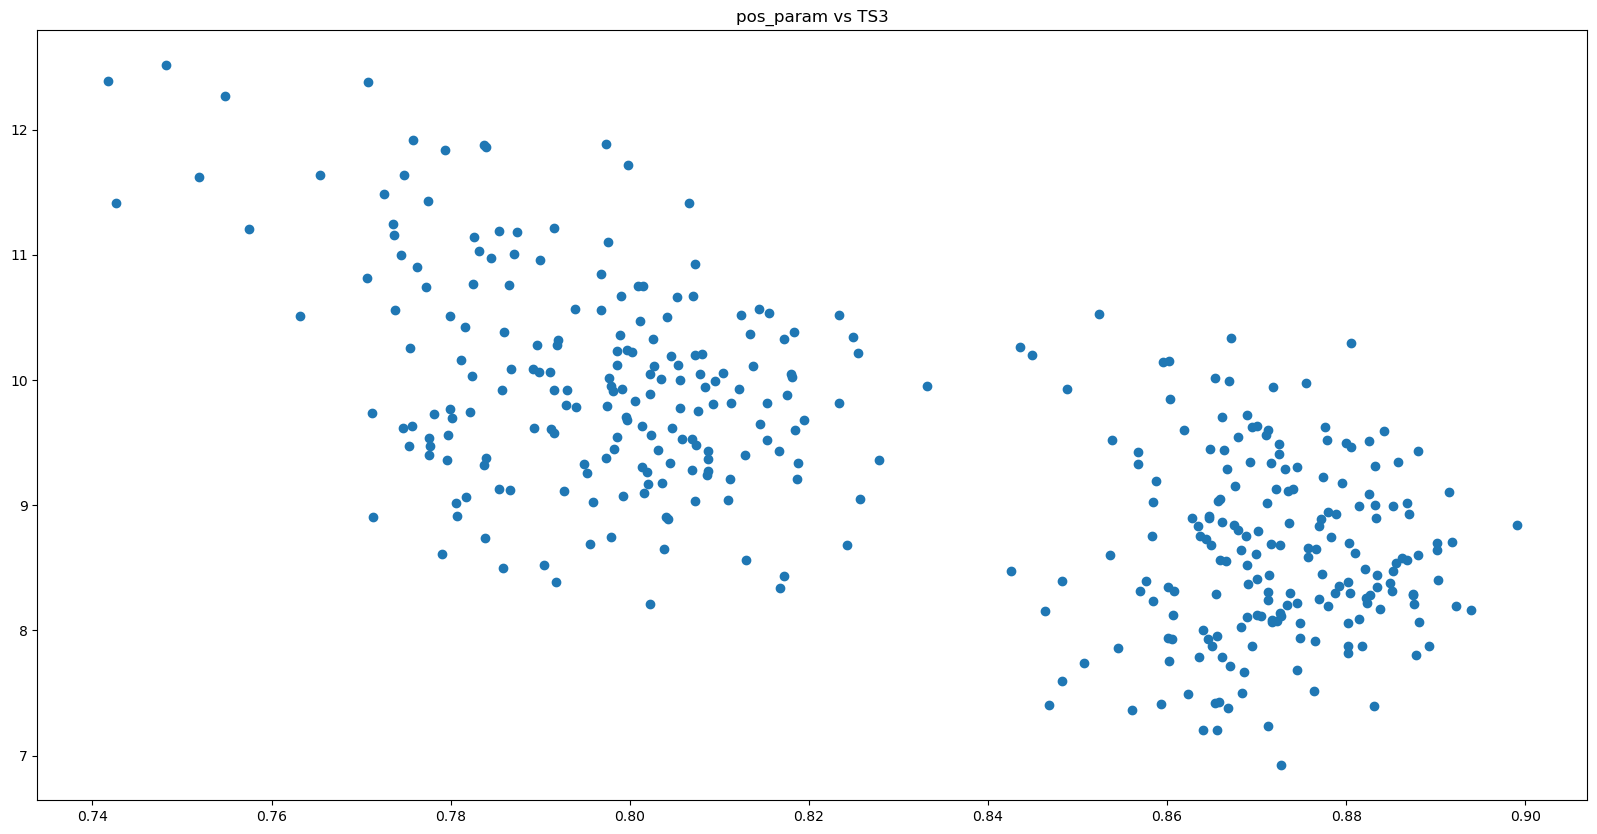

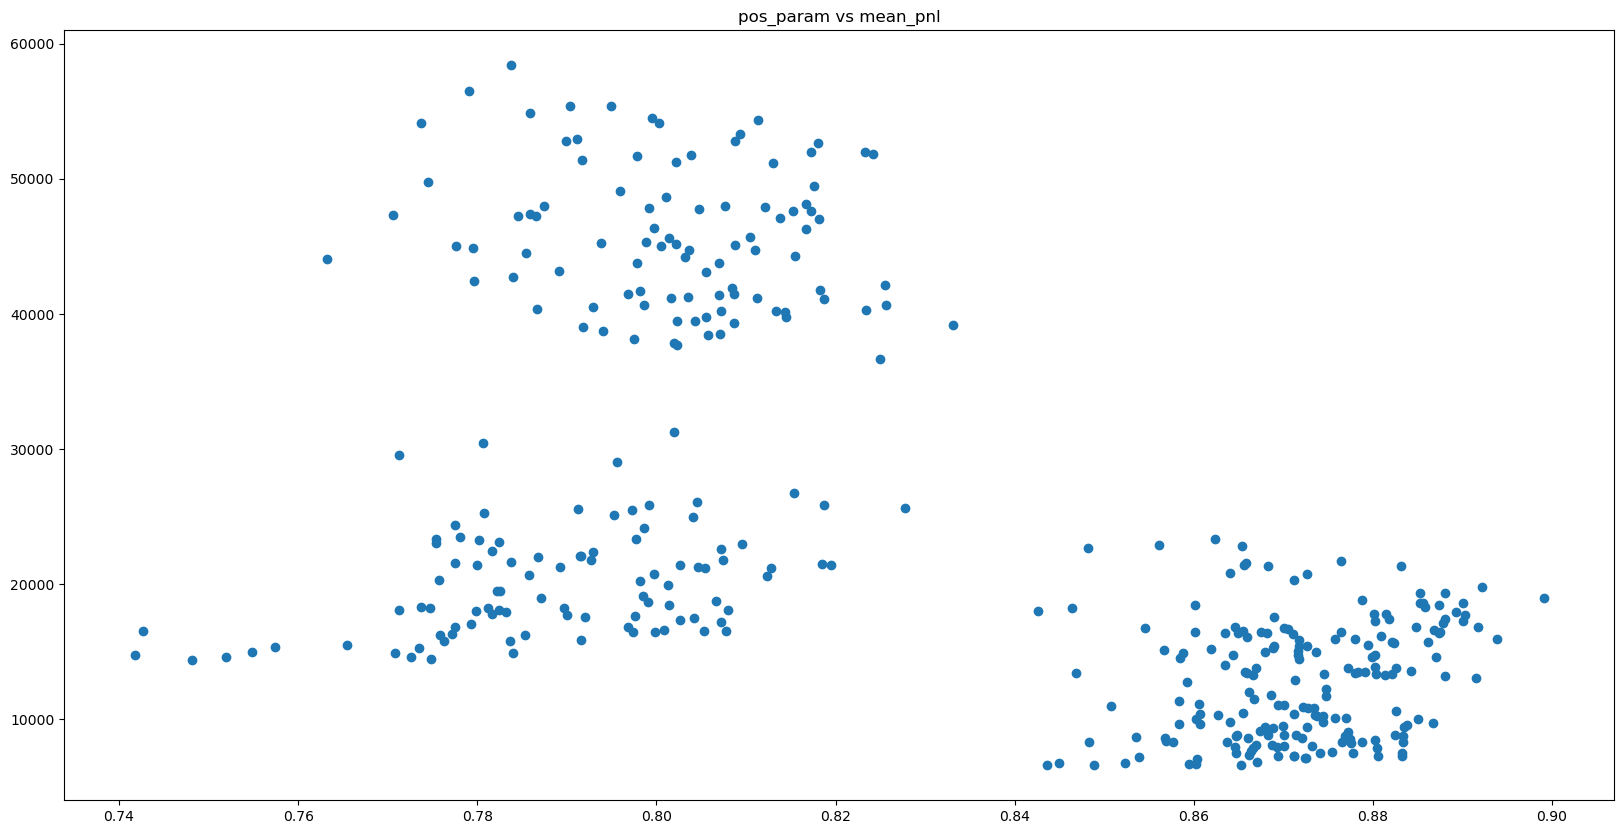

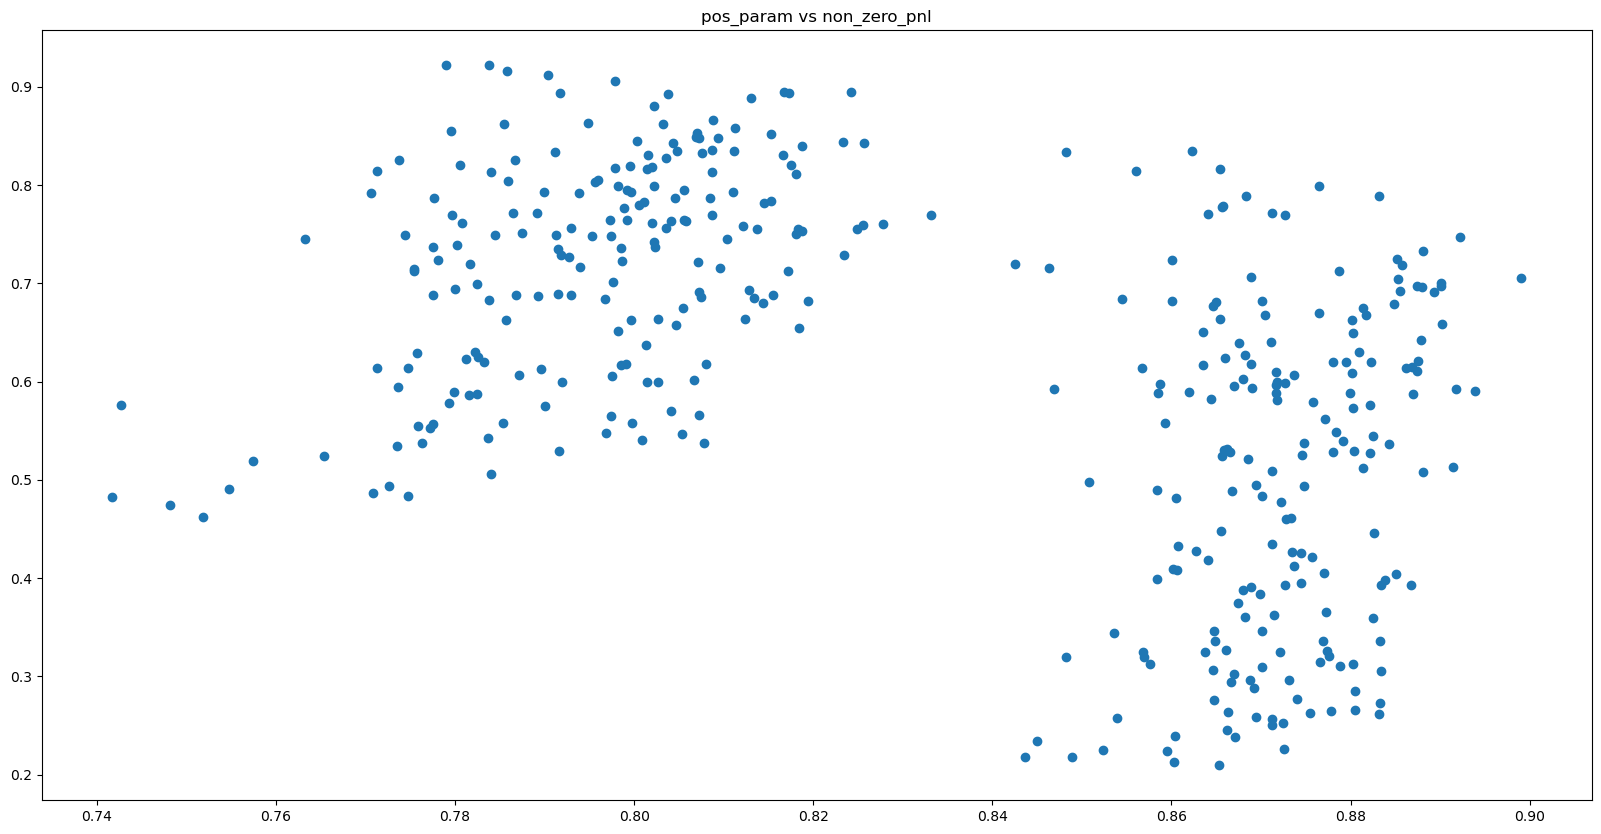

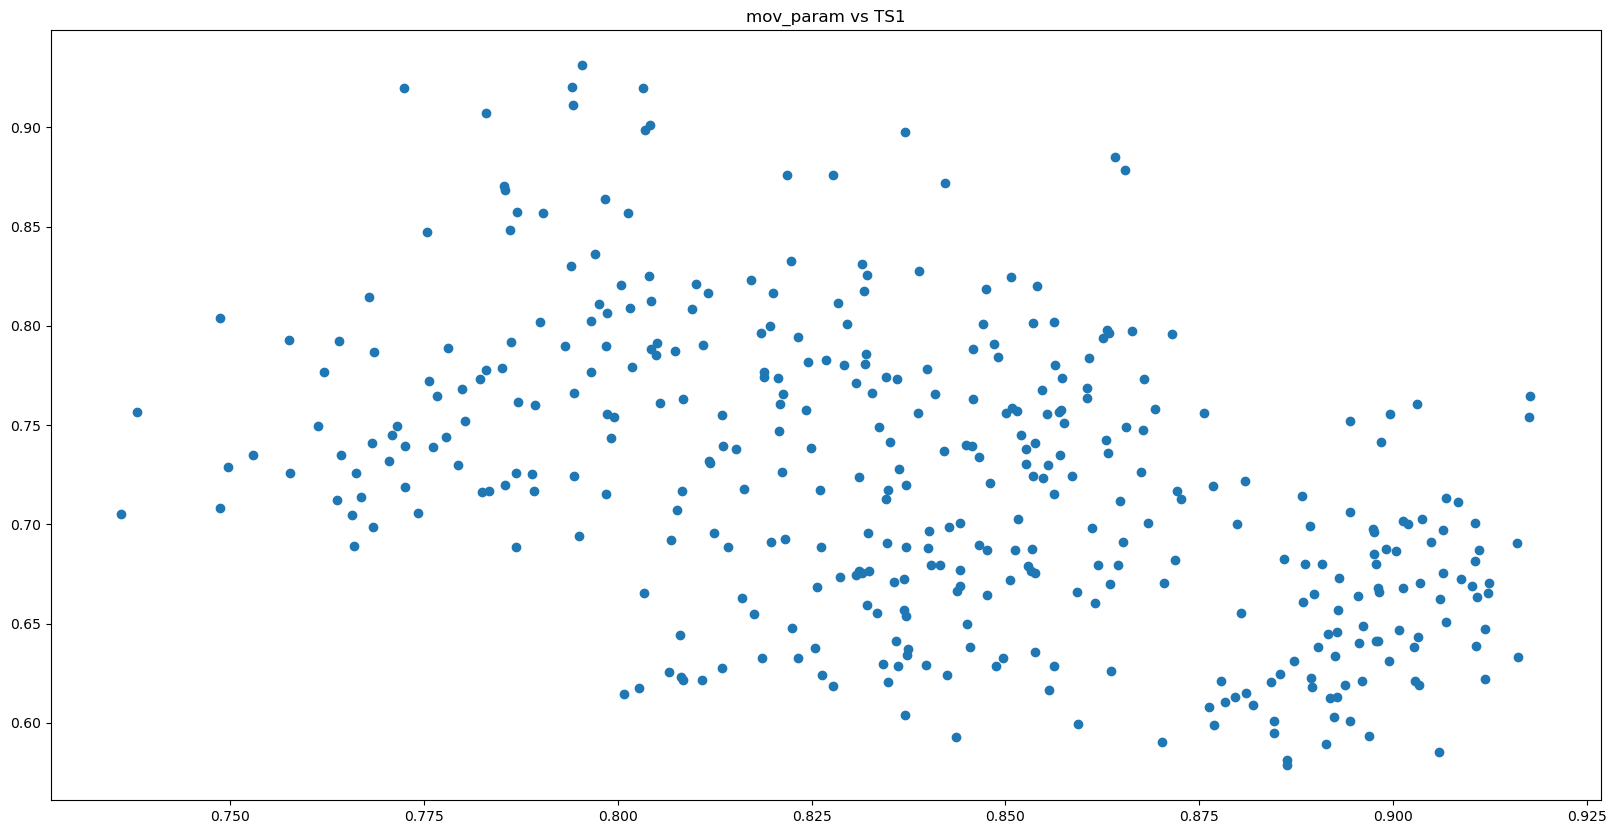

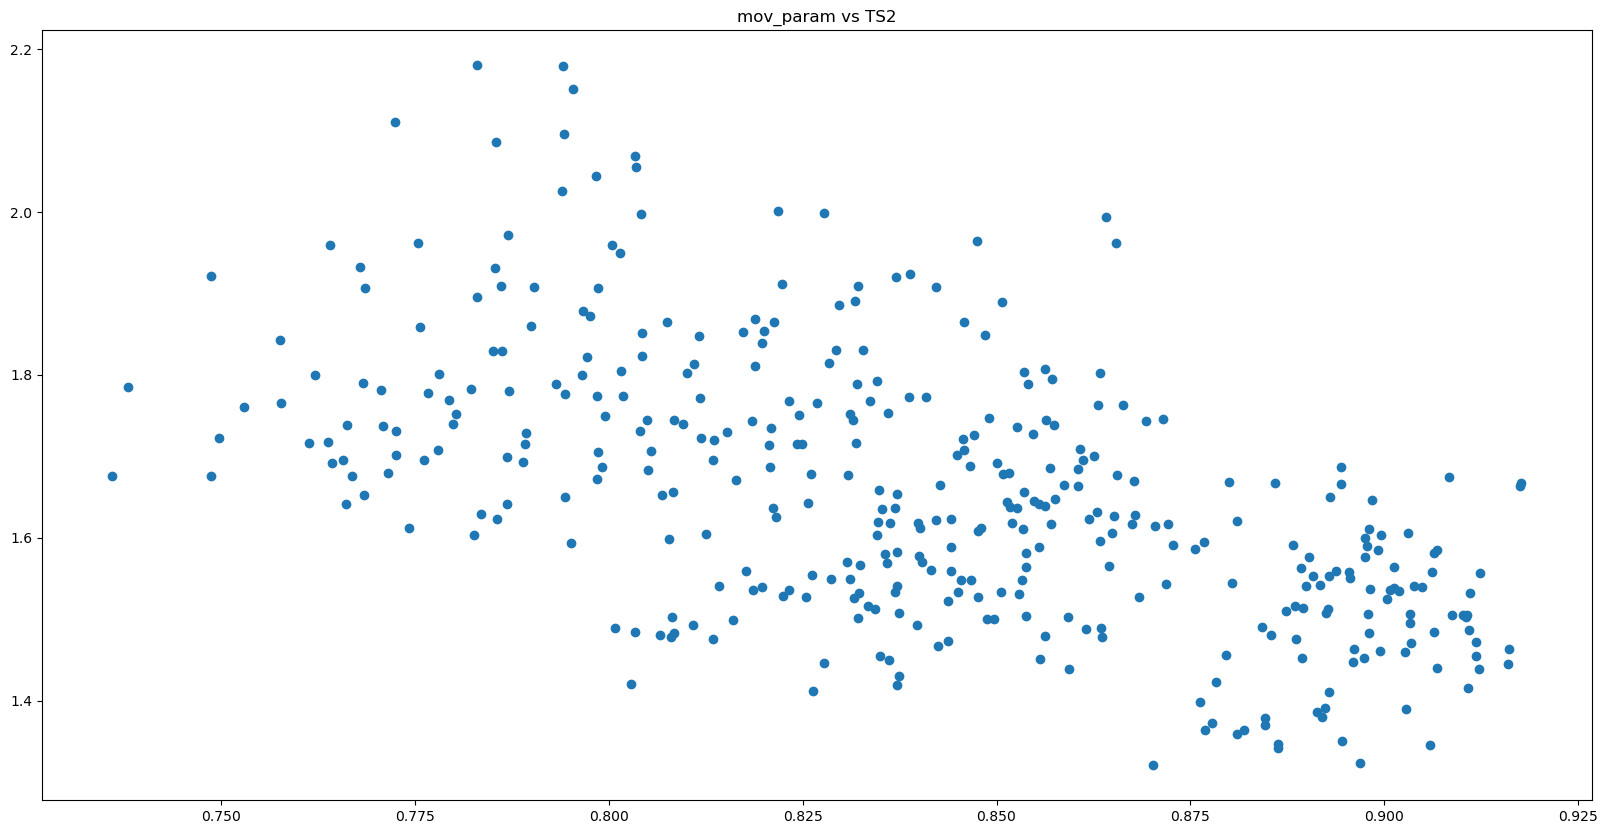

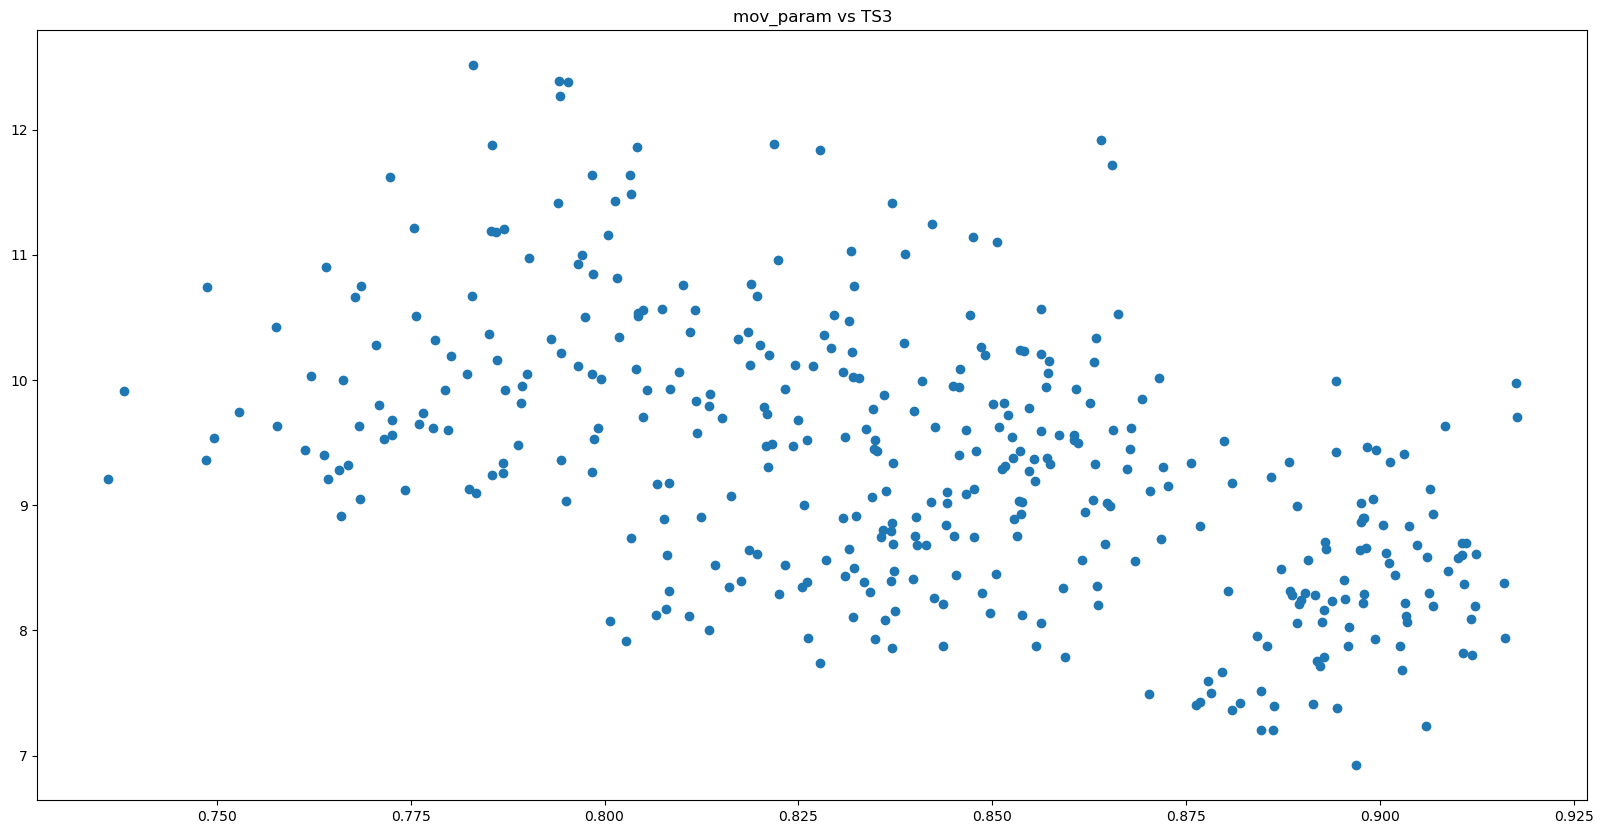

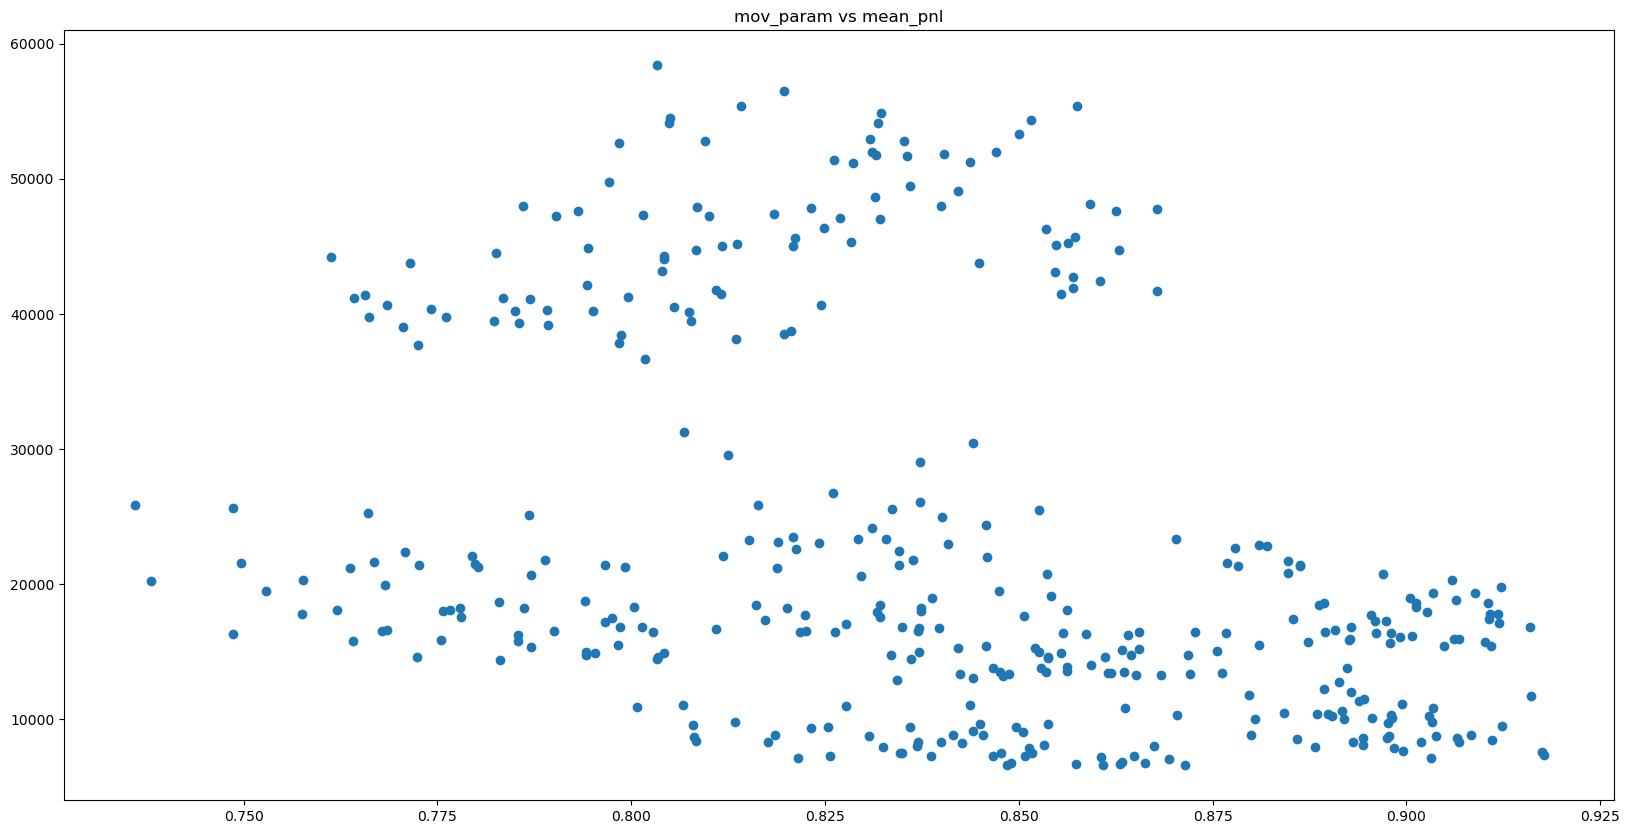

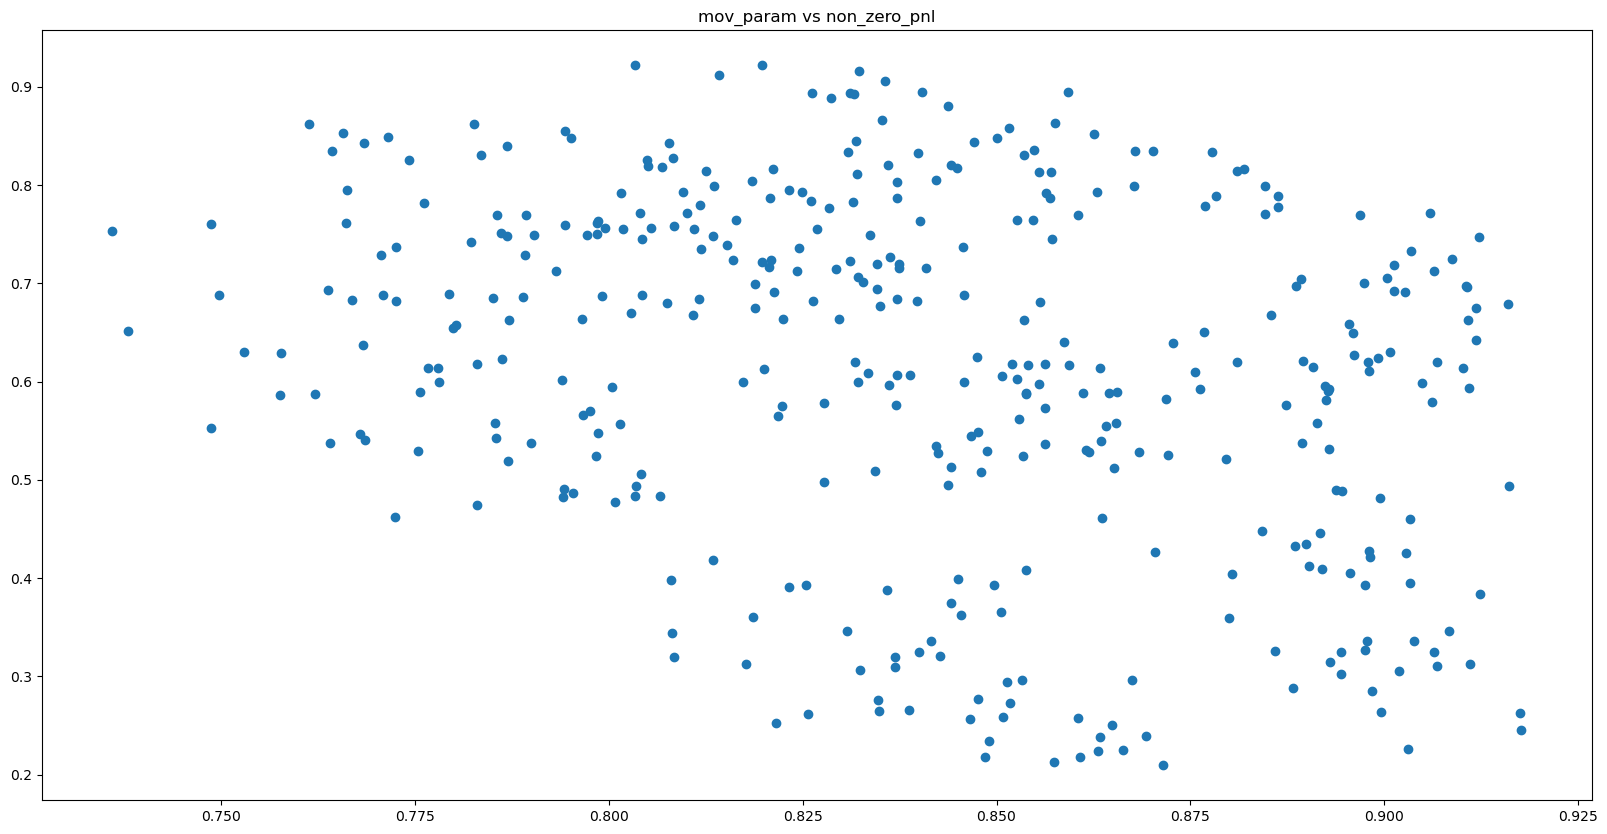

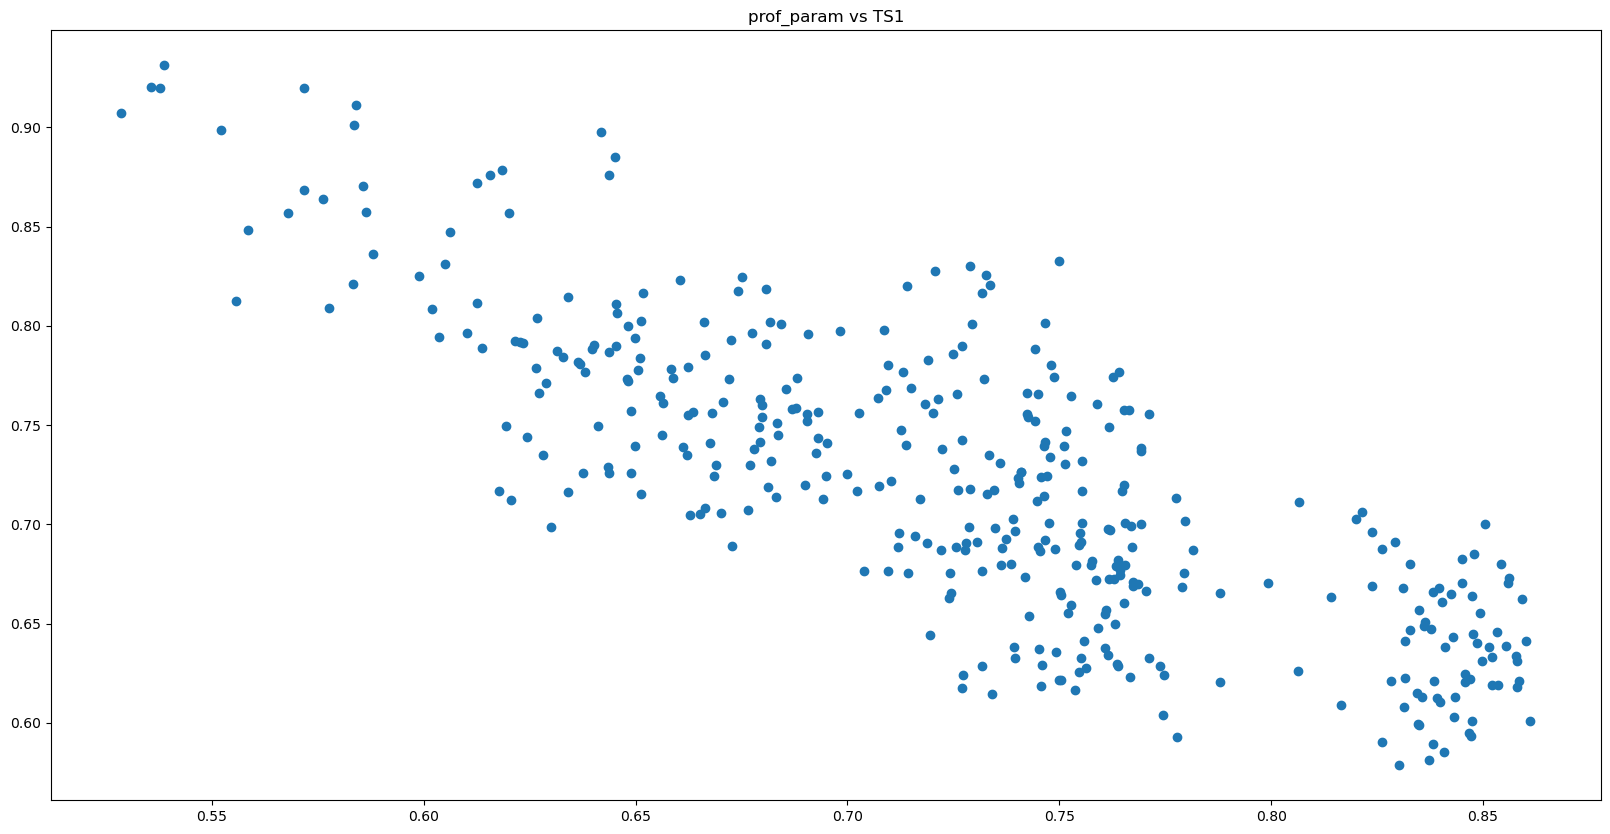

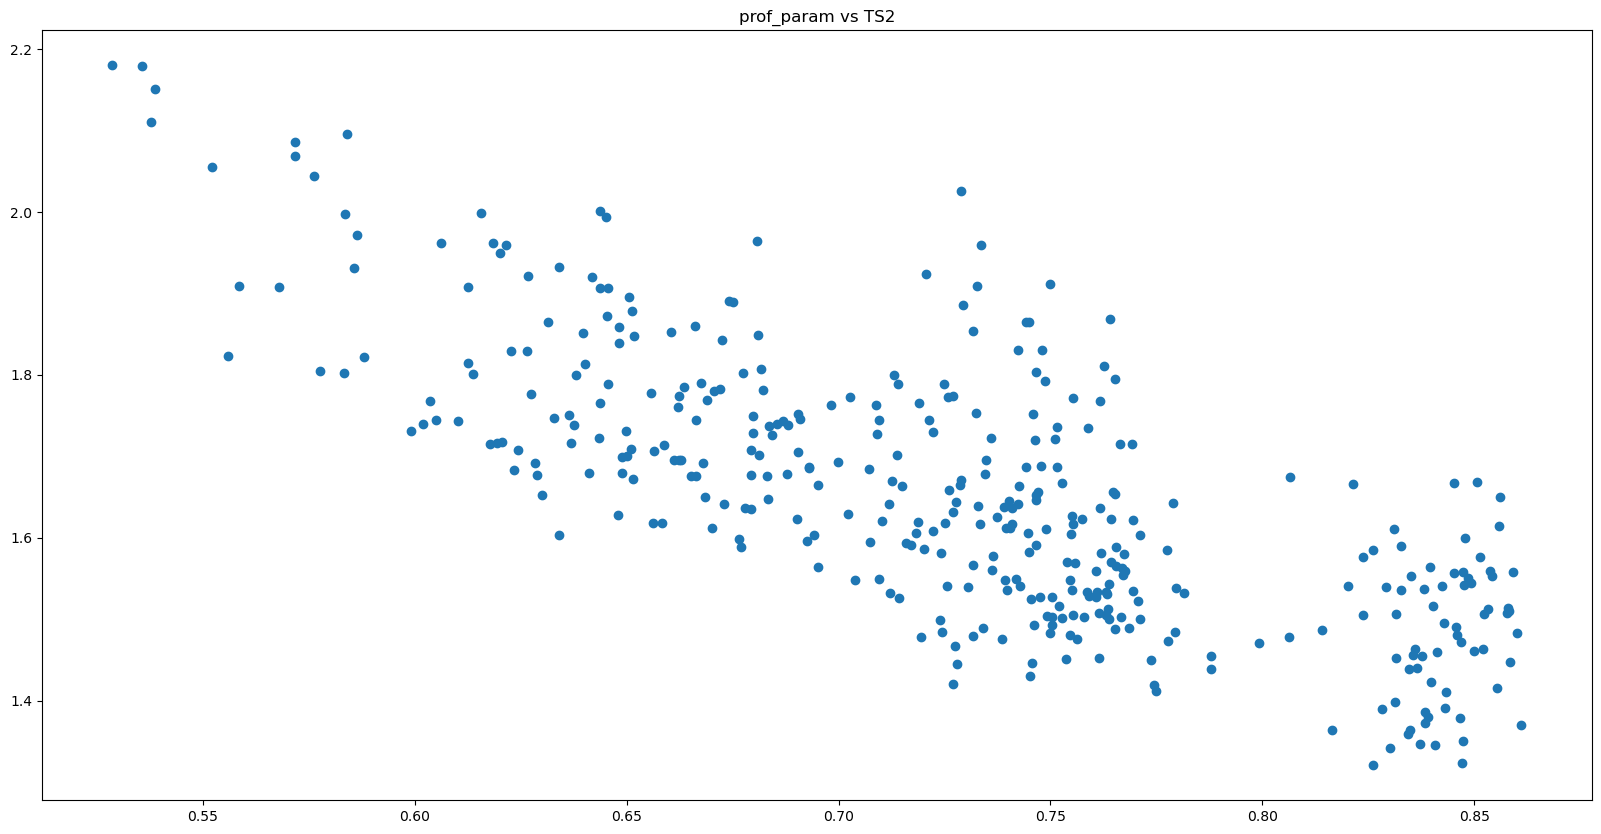

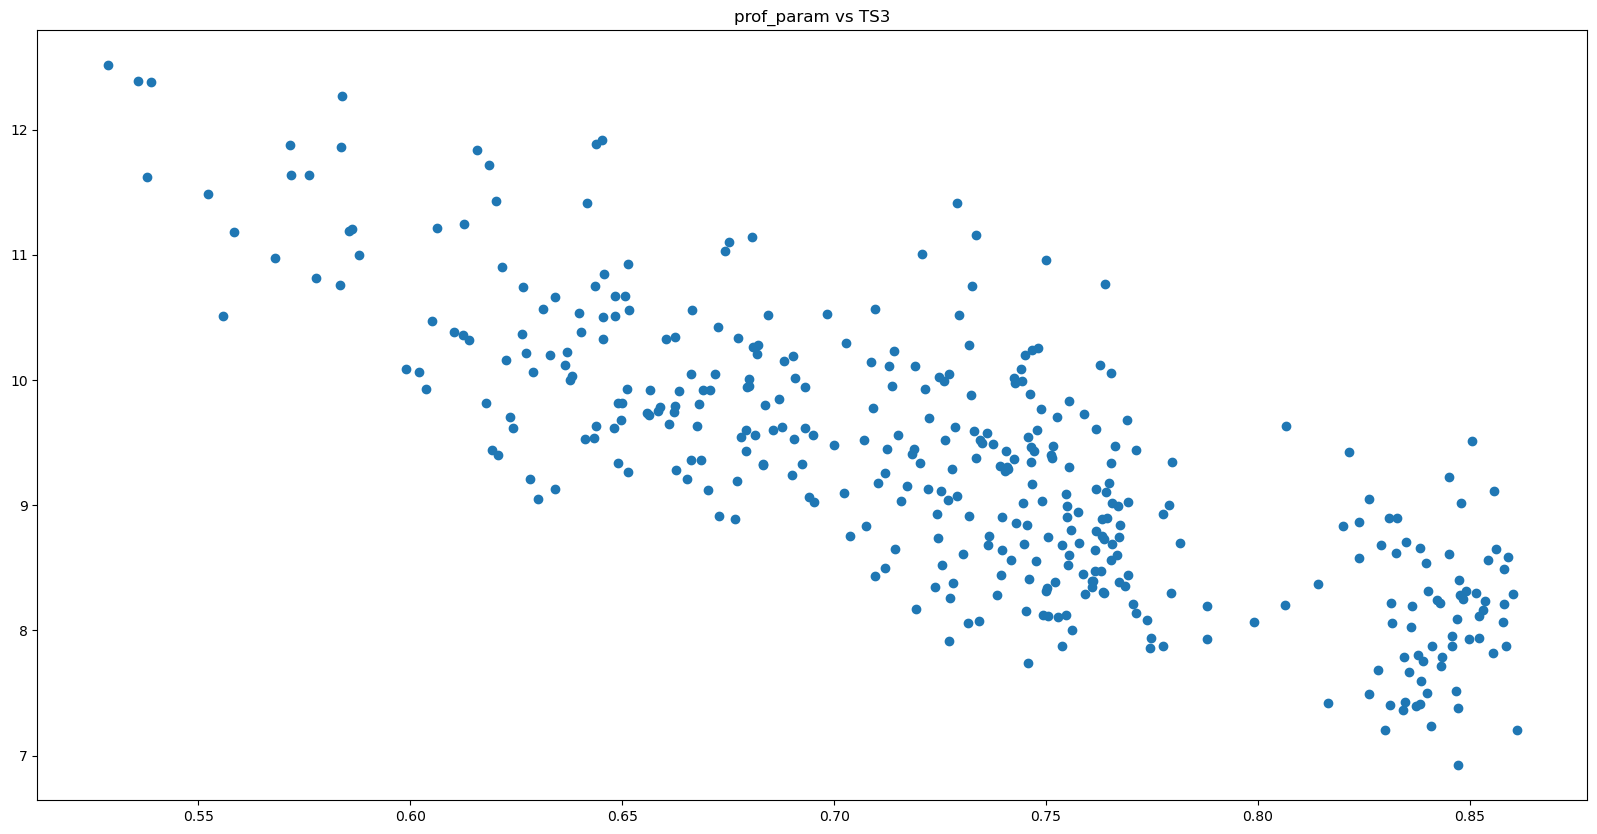

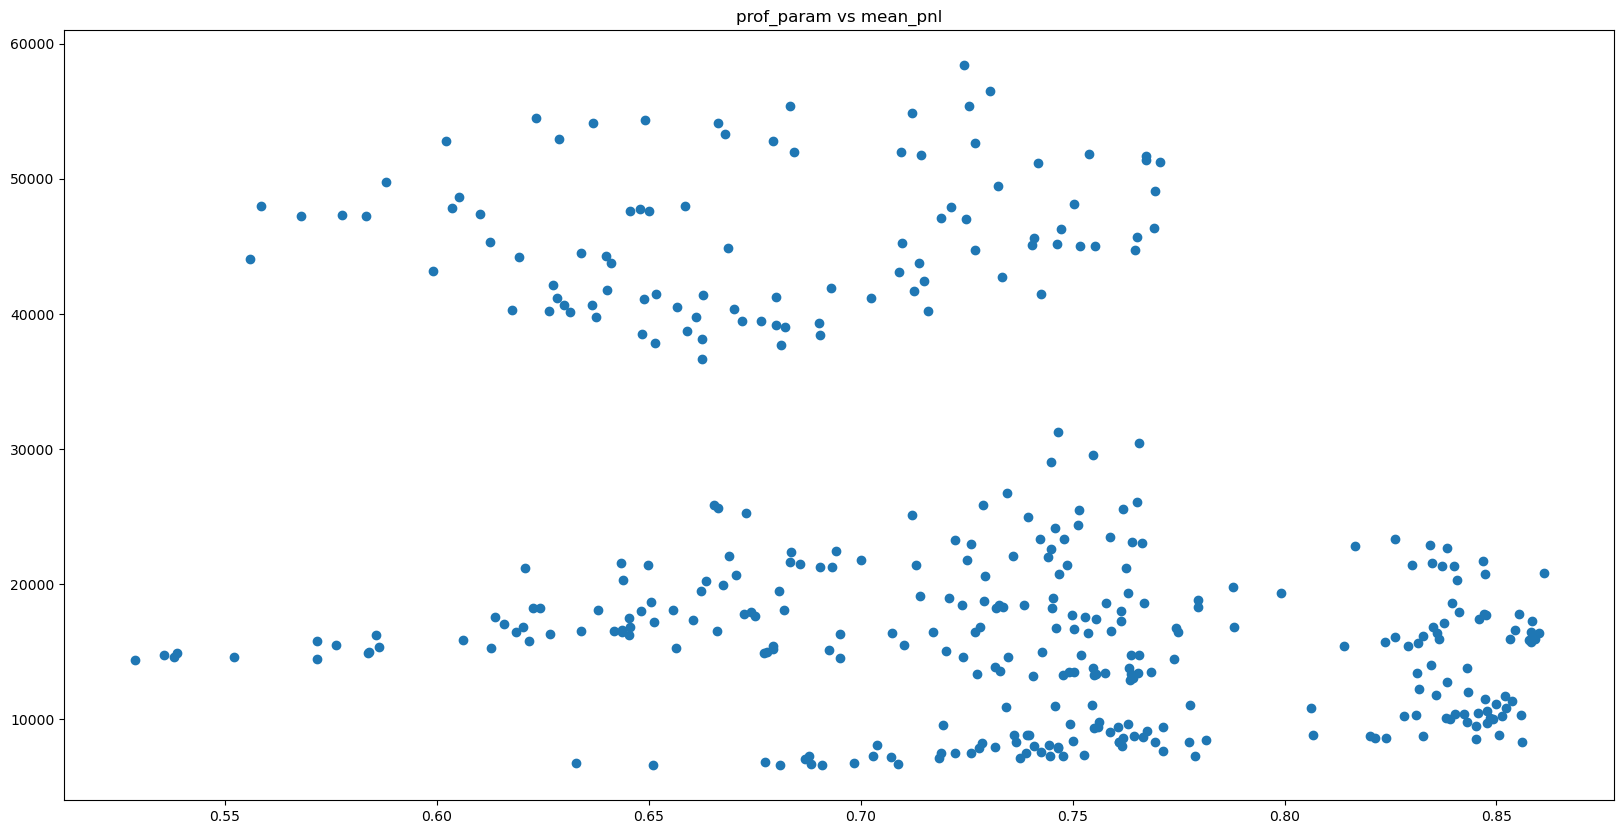

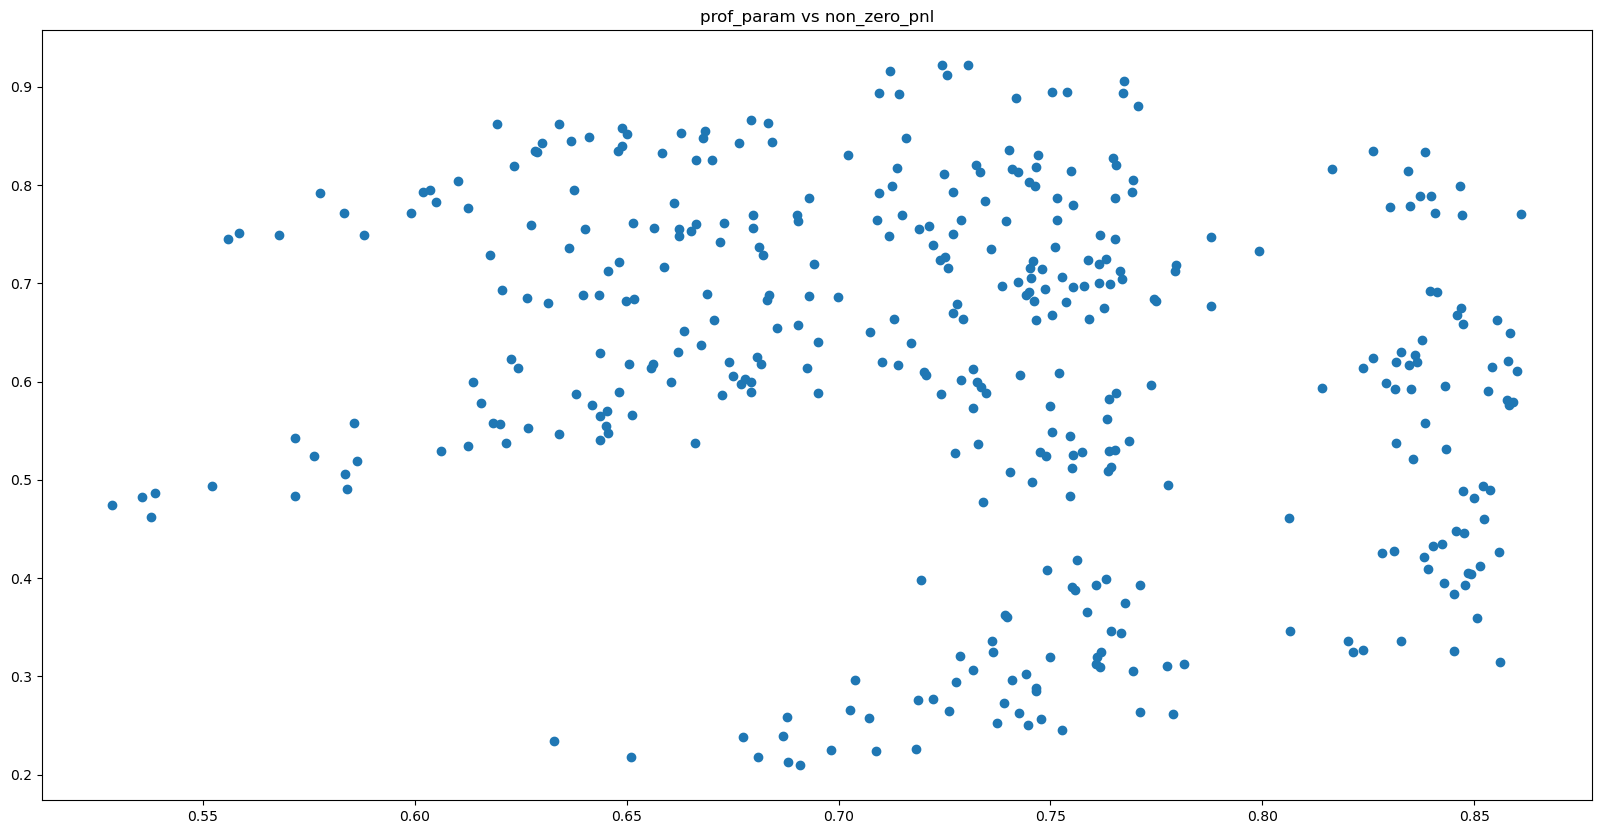

FileNotFoundError: [Errno 2] No such file or directory: 'pos_errors_NIFTY'

In [7]:
prof_corr=[]
pos_corr=[]
mov_corr=[]
mean_pnl=[]
non_zero_pnl=[]
ts1=[]
ts2=[]
ts3=[]
ts1_max=[]
ts2_max=[]
ts3_max=[]
ts1_min=[]
ts2_min=[]
ts3_min=[]

pos_df=pd.DataFrame(index=df.date.unique())
mov_df=pd.DataFrame(index=df.date.unique())
prof_df=pd.DataFrame(index=df.date.unique())
pos_errors=pd.DataFrame()
mov_errors=pd.DataFrame()
prof_errors=pd.DataFrame()

for i in range(1,385):

    sub_=df[df.strategy_variant==i][["date","pos_param","mov_param","prof_param","pnl","taylor_sensitivity_1","taylor_sensitivity_2","taylor_sensitivity_3"]]
    sub_.sort_values('date',inplace=True)
    sub=sub_[["date","pos_param","mov_param","prof_param"]]
    sub["lagged_pos_param"]=sub.pos_param.shift()
    sub["lagged_mov_param"]=sub.mov_param.shift()
    sub["lagged_prof_param"]=sub.prof_param.shift()
    mean_pnl.append(sub_.pnl.mean())
    non_zero_pnl.append(len(sub_[sub_.pnl>10000])/len(sub_))
    ts1.append(sub_.taylor_sensitivity_1.median())
    ts2.append(sub_.taylor_sensitivity_2.median())
    ts3.append(sub_.taylor_sensitivity_3.median())
    ts1_max.append(sub_.taylor_sensitivity_1.max())
    ts2_max.append(sub_.taylor_sensitivity_2.max())
    ts3_max.append(sub_.taylor_sensitivity_3.max())
    ts1_min.append(sub_.taylor_sensitivity_1.min())
    ts2_min.append(sub_.taylor_sensitivity_2.min())
    ts3_min.append(sub_.taylor_sensitivity_3.min())
    pos_df[i]=pos_df.index.map(sub.set_index('date').pos_param.to_dict())
    mov_df[i]=mov_df.index.map(sub.set_index('date').mov_param.to_dict())
    prof_df[i]=prof_df.index.map(sub.set_index('date').prof_param.to_dict())
    j=sub.corr()
    pos_corr.append(j.iloc[3,0])
    mov_corr.append(j.iloc[4,1])
    prof_corr.append(j.iloc[5,2])
    #pos_errors[i]=pred_errors(list(sub.pos_param))
    #mov_errors[i]=pred_errors(list(sub.mov_param))
    #prof_errors[i]=pred_errors(list(sub.prof_param))
    sub.dropna(inplace=True)

pos_df=pos_df.corr()
pos_df[pos_df==1]=0
mov_df=mov_df.corr()
mov_df[mov_df==1]=0
prof_df=prof_df.corr()
prof_df[prof_df==1]=0
p=len(pos_df)

plt.figure(figsize=(20,10))
plt.plot(pos_corr,label="pos_corr")
plt.title(f"pos_corr_self: Max={round(max(pos_corr),2)}, Mean= {round((sum(pos_corr)/len(pos_corr))*p/(p-1),2)}, Min={round(min(pos_corr),2)}")
plt.legend()
plt.show()
plt.figure(figsize=(20,10))
plt.plot(mov_corr,label="mov_corr")
plt.title(f"mov_corr_self: Max={round(max(mov_corr),2)}, Mean= {round((sum(mov_corr)/len(mov_corr))*p/(p-1),2)}, Min={round(min(mov_corr),2)}")
plt.legend()
plt.show()
plt.figure(figsize=(20,10))
plt.plot(prof_corr,label="prof_corr")
plt.title(f"prof_corr_self: Max={round(max(prof_corr),2)}, Mean= {round((sum(prof_corr)/len(prof_corr))*p/(p-1),2)}, Min={round(min(prof_corr),2)}")
plt.legend()
plt.show()
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.plot(mean_pnl,label="mean_pnl")
ax1.set_ylabel('mean_pnl')
plt.legend()
ax2=ax1.twinx()
ax2.plot(non_zero_pnl,label="non_zero_pnl",color="g")
ax2.set_ylabel('non_zero_pnl')
plt.legend()
plt.show()
plt.figure(figsize=(20,10))
plt.plot(ts1,label="ts1_mean")
plt.plot(ts2,label="ts2_mean")
plt.legend()
plt.show()
plt.figure(figsize=(20,10))
plt.plot(ts3,label="ts3_mean")
plt.legend()
plt.show()
plt.figure(figsize=(20,10))
plt.plot(ts1_max,label="ts1_max")
plt.legend()
plt.show()
plt.figure(figsize=(20,10))
plt.plot(ts2_max,label="ts2_max")
plt.legend()
plt.show()
plt.figure(figsize=(20,10))
plt.plot(ts3_max,label="ts3_max")
plt.legend()
plt.show()
plt.figure(figsize=(20,10))
plt.plot(ts1_min,label="ts1_min")
plt.legend()
plt.show()
plt.figure(figsize=(20,10))
plt.plot(ts2_min,label="ts2_min")
plt.legend()
plt.show()
plt.figure(figsize=(20,10))
plt.plot(ts3_min,label="ts3_min")
plt.legend()
plt.show()

plt.figure(figsize=(20,10))
plt.plot(pos_df.min(),label="min_corr")
plt.plot(pos_df.mean(),label="mean_corr")
plt.plot(pos_df.max(),label="max_corr")
plt.title(f"pos_param: Max = {round(pos_df.to_numpy().max(),2)}, Mean = {round(pos_df.to_numpy().mean()*p/(p-1),2)}, Min = {round(pos_df.to_numpy().min(),2)}")
plt.legend()
plt.show()

plt.figure(figsize=(20,10))
plt.plot(mov_df.min(),label="min_corr")
plt.plot(mov_df.mean(),label="mean_corr")
plt.plot(mov_df.max(),label="max_corr")
plt.title(f"mov_param: Max={round(mov_df.to_numpy().max(),2)}, Mean= {round(mov_df.to_numpy().mean()*p/(p-1),2)}, Min={round(mov_df.to_numpy().min(),2)}")
plt.legend()
plt.show()

plt.figure(figsize=(20,10))
plt.plot(prof_df.min(),label="min_corr")
plt.plot(prof_df.mean(),label="mean_corr")
plt.plot(prof_df.max(),label="max_corr")
plt.title(f"prof_param: Max={round(prof_df.to_numpy().max(),2)}, Mean= {round(prof_df.to_numpy().mean()*p/(p-1),2)}, Min={round(prof_df.to_numpy().min(),2)}")
plt.legend()
plt.show()

plt.figure(figsize=(20,10))
plt.scatter(mean_pnl,non_zero_pnl)
plt.title("Mean PnL vs Non-Zero PnL percentage")
plt.show()
plt.figure(figsize=(20,10))
plt.scatter(mean_pnl,ts1)
plt.title("Mean PnL vs TS1")
plt.show()
plt.figure(figsize=(20,10))
plt.scatter(non_zero_pnl,ts1)
plt.title("Non-Zero PnL percentage vs TS1")
plt.show()
plt.figure(figsize=(20,10))
plt.scatter(mean_pnl,ts2)
plt.title("Mean PnL vs TS2")
plt.show()
plt.figure(figsize=(20,10))
plt.scatter(non_zero_pnl,ts2)
plt.title("Non-Zero PnL percentage vs TS2")
plt.show()
plt.figure(figsize=(20,10))
plt.scatter(mean_pnl,ts3)
plt.title("Mean PnL vs TS3")
plt.show()
plt.figure(figsize=(20,10))
plt.scatter(non_zero_pnl,ts3)
plt.title("Non-Zero PnL percentage vs TS3")
plt.show()
plt.figure(figsize=(20,10))
plt.scatter(pos_corr,ts1)
plt.title("pos_param vs TS1")
plt.show()
plt.figure(figsize=(20,10))
plt.scatter(pos_corr,ts2)
plt.title("pos_param vs TS2")
plt.show()
plt.figure(figsize=(20,10))
plt.scatter(pos_corr,ts3)
plt.title("pos_param vs TS3")
plt.show()
plt.figure(figsize=(20,10))
plt.scatter(pos_corr,mean_pnl)
plt.title("pos_param vs mean_pnl")
plt.show()
plt.figure(figsize=(20,10))
plt.scatter(pos_corr,non_zero_pnl)
plt.title("pos_param vs non_zero_pnl")
plt.show()
plt.figure(figsize=(20,10))
plt.scatter(mov_corr,ts1)
plt.title("mov_param vs TS1")
plt.show()
plt.figure(figsize=(20,10))
plt.scatter(mov_corr,ts2)
plt.title("mov_param vs TS2")
plt.show()
plt.figure(figsize=(20,10))
plt.scatter(mov_corr,ts3)
plt.title("mov_param vs TS3")
plt.show()
plt.figure(figsize=(20,10))
plt.scatter(mov_corr,mean_pnl)
plt.title("mov_param vs mean_pnl")
plt.show()
plt.figure(figsize=(20,10))
plt.scatter(mov_corr,non_zero_pnl)
plt.title("mov_param vs non_zero_pnl")
plt.show()
plt.figure(figsize=(20,10))
plt.scatter(prof_corr,ts1)
plt.title("prof_param vs TS1")
plt.show()
plt.figure(figsize=(20,10))
plt.scatter(prof_corr,ts2)
plt.title("prof_param vs TS2")
plt.show()
plt.figure(figsize=(20,10))
plt.scatter(prof_corr,ts3)
plt.title("prof_param vs TS3")
plt.show()
plt.figure(figsize=(20,10))
plt.scatter(prof_corr,mean_pnl)
plt.title("prof_param vs mean_pnl")
plt.show()
plt.figure(figsize=(20,10))
plt.scatter(prof_corr,non_zero_pnl)
plt.title("prof_param vs non_zero_pnl")
plt.show()

#pos_errors["date"]=sorted(df.date.unique())[100:]
#mov_errors["date"]=pos_errors["date"]
#prof_errors["date"]=pos_errors["date"]
pos_errors=pd.read_csv("pos_errors_NIFTY")
mov_errors=pd.read_csv("mov_errors_NIFTY")
prof_errors=pd.read_csv("prof_errors_NIFTY")

pos_errors.set_index('date',inplace=True)
mov_errors.set_index('date',inplace=True)
prof_errors.set_index('date',inplace=True)
pos_errors_=pos_errors.corr()
mov_errors_=mov_errors.corr()
prof_errors_=prof_errors.corr()
pos_errors_[pos_errors_==1]=0
mov_errors_[mov_errors_==1]=0
prof_errors_[prof_errors_==1]=0

plt.figure(figsize=(20,10))
plt.plot(pos_errors_.min(),label="min_corr")
plt.plot(pos_errors_.mean(),label="mean_corr")
plt.plot(pos_errors_.max(),label="max_corr")
plt.title(f"pos_errors_self: Max={round(pos_errors_.to_numpy().max(),2)}, Mean= {round(pos_errors_.to_numpy().mean()*p/(p-1),2)}, Min={round(pos_errors_.to_numpy().min(),2)}")
plt.legend()
plt.show()

plt.figure(figsize=(20,10))
plt.plot(mov_errors_.min(),label="min_corr")
plt.plot(mov_errors_.mean(),label="mean_corr")
plt.plot(mov_errors_.max(),label="max_corr")
plt.title(f"mov_errors_self: Max={round(mov_errors_.to_numpy().max(),2)}, Mean= {round(mov_errors_.to_numpy().mean()*p/(p-1),2)}, Min={round(mov_errors_.to_numpy().min(),2)}")
plt.legend()
plt.show()

plt.figure(figsize=(20,10))
plt.plot(prof_errors_.min(),label="min_corr")
plt.plot(prof_errors_.mean(),label="mean_corr")
plt.plot(prof_errors_.max(),label="max_corr")
plt.title(f"prof_errors_self: Max={round(prof_errors_.to_numpy().max(),2)}, Mean= {round(prof_errors_.to_numpy().mean()*p/(p-1),2)}, Min={round(prof_errors_.to_numpy().min(),2)}")
plt.legend()
plt.show()
"""
df_=df[df.date.isin(prof_errors.index)][["date","strategy_variant","pos_param","mov_param","prof_param","sim_vol"]].sort_values(['date','strategy_variant']).set_index('date')
pivot_pos=pd.pivot_table(df_[["strategy_variant","pos_param"]],index=['date'],columns=['strategy_variant'],values=['pos_param'])
pivot_pos.columns=[n for p,n in pivot_pos.columns]
pivot_mov=pd.pivot_table(df_[["strategy_variant","mov_param"]],index=['date'],columns=['strategy_variant'],values=['mov_param'])
pivot_mov.columns=[n for p,n in pivot_mov.columns]
pivot_prof=pd.pivot_table(df_[["strategy_variant","prof_param"]],index=['date'],columns=['strategy_variant'],values=['prof_param'])
pivot_prof.columns=[n for p,n in pivot_prof.columns]
pivot_sim_vol=pd.pivot_table(df_[["strategy_variant","sim_vol"]],index=['date'],columns=['strategy_variant'],values=['sim_vol'])
pivot_sim_vol.columns=[n for p,n in pivot_sim_vol.columns]

pivot=pivot_pos
pos_errors_corr_pos_params_lagged=pd.DataFrame(index=pivot.columns,columns=pivot.columns)
mov_errors_corr_pos_params_lagged=pd.DataFrame(index=pivot.columns,columns=pivot.columns)
prof_errors_corr_pos_params_lagged=pd.DataFrame(index=pivot.columns,columns=pivot.columns)
pos_errors_corr_pos_params_lagged_diff=pd.DataFrame(index=pivot.columns,columns=pivot.columns)
mov_errors_corr_pos_params_lagged_diff=pd.DataFrame(index=pivot.columns,columns=pivot.columns)
prof_errors_corr_pos_params_lagged_diff=pd.DataFrame(index=pivot.columns,columns=pivot.columns)
pos_errors_corr_mov_params_lagged=pd.DataFrame(index=pivot.columns,columns=pivot.columns)
mov_errors_corr_mov_params_lagged=pd.DataFrame(index=pivot.columns,columns=pivot.columns)
prof_errors_corr_mov_params_lagged=pd.DataFrame(index=pivot.columns,columns=pivot.columns)
pos_errors_corr_mov_params_lagged_diff=pd.DataFrame(index=pivot.columns,columns=pivot.columns)
mov_errors_corr_mov_params_lagged_diff=pd.DataFrame(index=pivot.columns,columns=pivot.columns)
prof_errors_corr_mov_params_lagged_diff=pd.DataFrame(index=pivot.columns,columns=pivot.columns)
pos_errors_corr_prof_params_lagged=pd.DataFrame(index=pivot.columns,columns=pivot.columns)
mov_errors_corr_prof_params_lagged=pd.DataFrame(index=pivot.columns,columns=pivot.columns)
prof_errors_corr_prof_params_lagged=pd.DataFrame(index=pivot.columns,columns=pivot.columns)
pos_errors_corr_prof_params_lagged_diff=pd.DataFrame(index=pivot.columns,columns=pivot.columns)
mov_errors_corr_prof_params_lagged_diff=pd.DataFrame(index=pivot.columns,columns=pivot.columns)
prof_errors_corr_prof_params_lagged_diff=pd.DataFrame(index=pivot.columns,columns=pivot.columns)
pos_errors_corr_sim_vol_lagged=pd.DataFrame(index=pivot.columns,columns=pivot.columns)
mov_errors_corr_sim_vol_lagged=pd.DataFrame(index=pivot.columns,columns=pivot.columns)
prof_errors_corr_sim_vol_lagged=pd.DataFrame(index=pivot.columns,columns=pivot.columns)
pos_errors_corr_sim_vol_lagged_diff=pd.DataFrame(index=pivot.columns,columns=pivot.columns)
mov_errors_corr_sim_vol_lagged_diff=pd.DataFrame(index=pivot.columns,columns=pivot.columns)
prof_errors_corr_sim_vol_lagged_diff=pd.DataFrame(index=pivot.columns,columns=pivot.columns)

for col in pos_errors.columns:
    print(col)
    pivot_pos_=pivot_pos.copy()
    pivot_pos_[int(col)]=pos_errors[col]
    pivot_pos_[int(col)]=pivot_pos_[int(col)].shift(-1)
    pivot_pos_.dropna(inplace=True)
    pos_errors_corr_pos_params_lagged[int(col)]=pivot_pos_.corr()[int(col)]
    pivot_pos_[int(col)]=mov_errors[col].shift(-1).dropna()
    mov_errors_corr_pos_params_lagged[int(col)]=pivot_pos_.corr()[int(col)]
    pivot_pos_[int(col)]=prof_errors[col].shift(-1).dropna()
    prof_errors_corr_pos_params_lagged[int(col)]=pivot_pos_.corr()[int(col)]

    
    pivot_pos_=pivot_pos.copy()
    pivot_pos_=pivot_pos_.diff()
    pivot_pos_[int(col)]=pos_errors[col]
    pivot_pos_[int(col)]=pivot_pos_[int(col)].shift(-1)
    pivot_pos_.dropna(inplace=True)
    pos_errors_corr_pos_params_lagged_diff[int(col)]=pivot_pos_.corr()[int(col)]
    pivot_pos_[int(col)]=mov_errors[col].shift(-1)[1:].dropna()
    mov_errors_corr_pos_params_lagged_diff[int(col)]=pivot_pos_.corr()[int(col)]
    pivot_pos_[int(col)]=prof_errors[col].shift(-1)[1:].dropna()
    prof_errors_corr_pos_params_lagged_diff[int(col)]=pivot_pos_.corr()[int(col)]

    
    pivot_mov_=pivot_mov.copy()
    pivot_mov_[int(col)]=pos_errors[col]
    pivot_mov_[int(col)]=pivot_mov_[int(col)].shift(-1)
    pivot_mov_.dropna(inplace=True)
    pos_errors_corr_mov_params_lagged[int(col)]=pivot_mov_.corr()[int(col)]
    pivot_mov_[int(col)]=mov_errors[col].shift(-1).dropna()
    mov_errors_corr_mov_params_lagged[int(col)]=pivot_mov_.corr()[int(col)]
    pivot_mov_[int(col)]=prof_errors[col].shift(-1).dropna()
    prof_errors_corr_mov_params_lagged[int(col)]=pivot_mov_.corr()[int(col)]

    pivot_mov_=pivot_mov.copy()
    pivot_mov_=pivot_mov_.diff()
    pivot_mov_[int(col)]=pos_errors[col]
    pivot_mov_[int(col)]=pivot_mov_[int(col)].shift(-1)
    pivot_mov_.dropna(inplace=True)
    pos_errors_corr_mov_params_lagged_diff[int(col)]=pivot_mov_.corr()[int(col)]
    pivot_mov_[int(col)]=mov_errors[col].shift(-1)[1:].dropna()
    mov_errors_corr_mov_params_lagged_diff[int(col)]=pivot_mov_.corr()[int(col)]
    pivot_mov_[int(col)]=prof_errors[col].shift(-1)[1:].dropna()
    prof_errors_corr_mov_params_lagged_diff[int(col)]=pivot_mov_.corr()[int(col)]

    
    
    pivot_prof_=pivot_prof.copy()
    pivot_prof_[int(col)]=pos_errors[col]
    pivot_prof_[int(col)]=pivot_prof_[int(col)].shift(-1)
    pivot_prof_.dropna(inplace=True)
    pos_errors_corr_prof_params_lagged[int(col)]=pivot_prof_.corr()[int(col)]
    pivot_prof_[int(col)]=mov_errors[col].shift(-1).dropna()
    mov_errors_corr_prof_params_lagged[int(col)]=pivot_prof_.corr()[int(col)]
    pivot_prof_[int(col)]=prof_errors[col].shift(-1).dropna()
    prof_errors_corr_prof_params_lagged[int(col)]=pivot_prof_.corr()[int(col)]


    pivot_prof_=pivot_prof.copy()
    pivot_prof_=pivot_prof_.diff()
    pivot_prof_[int(col)]=pos_errors[col]
    pivot_prof_[int(col)]=pivot_prof_[int(col)].shift(-1)
    pivot_prof_.dropna(inplace=True)
    pos_errors_corr_prof_params_lagged_diff[int(col)]=pivot_prof_.corr()[int(col)]
    pivot_prof_[int(col)]=mov_errors[col].shift(-1)[1:].dropna()
    mov_errors_corr_prof_params_lagged_diff[int(col)]=pivot_prof_.corr()[int(col)]
    pivot_prof_[int(col)]=prof_errors[col].shift(-1)[1:].dropna()
    prof_errors_corr_prof_params_lagged_diff[int(col)]=pivot_prof_.corr()[int(col)]

    
    
    pivot_sim_vol_=pivot_sim_vol.copy()
    pivot_sim_vol_[int(col)]=pos_errors[col]
    pivot_sim_vol_[int(col)]=pivot_sim_vol_[int(col)].shift(-1)
    pivot_sim_vol_.dropna(inplace=True)
    pos_errors_corr_sim_vol_lagged[int(col)]=pivot_sim_vol_.corr()[int(col)]
    pivot_sim_vol_[int(col)]=mov_errors[col].shift(-1).dropna()
    mov_errors_corr_sim_vol_lagged[int(col)]=pivot_sim_vol_.corr()[int(col)]
    pivot_sim_vol_[int(col)]=prof_errors[col].shift(-1).dropna()
    prof_errors_corr_sim_vol_lagged[int(col)]=pivot_sim_vol_.corr()[int(col)]


    pivot_sim_vol_=pivot_sim_vol.copy()
    pivot_sim_vol_=pivot_sim_vol_.diff()
    pivot_sim_vol_[int(col)]=pos_errors[col]
    pivot_sim_vol_[int(col)]=pivot_sim_vol_[int(col)].shift(-1)
    pivot_sim_vol_.dropna(inplace=True)
    pos_errors_corr_sim_vol_lagged_diff[int(col)]=pivot_sim_vol_.corr()[int(col)]
    pivot_sim_vol_[int(col)]=mov_errors[col].shift(-1)[1:].dropna()
    mov_errors_corr_sim_vol_lagged_diff[int(col)]=pivot_sim_vol_.corr()[int(col)]
    pivot_sim_vol_[int(col)]=prof_errors[col].shift(-1)[1:].dropna()
    prof_errors_corr_sim_vol_lagged_diff[int(col)]=pivot_sim_vol_.corr()[int(col)]



corr=[pos_errors_corr_pos_params_lagged,mov_errors_corr_pos_params_lagged,prof_errors_corr_pos_params_lagged,
pos_errors_corr_pos_params_lagged_diff,mov_errors_corr_pos_params_lagged_diff,prof_errors_corr_pos_params_lagged_diff,
pos_errors_corr_mov_params_lagged,mov_errors_corr_mov_params_lagged,prof_errors_corr_mov_params_lagged,
pos_errors_corr_mov_params_lagged_diff,mov_errors_corr_mov_params_lagged_diff,prof_errors_corr_mov_params_lagged_diff,
pos_errors_corr_prof_params_lagged,mov_errors_corr_prof_params_lagged,prof_errors_corr_prof_params_lagged,
pos_errors_corr_prof_params_lagged_diff,mov_errors_corr_prof_params_lagged_diff,prof_errors_corr_prof_params_lagged_diff,
pos_errors_corr_sim_vol_lagged,mov_errors_corr_sim_vol_lagged,prof_errors_corr_sim_vol_lagged,
pos_errors_corr_sim_vol_lagged_diff,mov_errors_corr_sim_vol_lagged_diff,prof_errors_corr_sim_vol_lagged_diff]

corr_str=["pos_errors_corr_pos_params_lagged","mov_errors_corr_pos_params_lagged","prof_errors_corr_pos_params_lagged",
"pos_errors_corr_pos_params_lagged_diff","mov_errors_corr_pos_params_lagged_diff","prof_errors_corr_pos_params_lagged_diff",
"pos_errors_corr_mov_params_lagged","mov_errors_corr_mov_params_lagged","prof_errors_corr_mov_params_lagged",
"pos_errors_corr_mov_params_lagged_diff","mov_errors_corr_mov_params_lagged_diff","prof_errors_corr_mov_params_lagged_diff",
"pos_errors_corr_prof_params_lagged","mov_errors_corr_prof_params_lagged","prof_errors_corr_prof_params_lagged",
"pos_errors_corr_prof_params_lagged_diff","mov_errors_corr_prof_params_lagged_diff","prof_errors_corr_prof_params_lagged_diff",
"pos_errors_corr_sim_vol_lagged","mov_errors_corr_sim_vol_lagged","prof_errors_corr_sim_vol_lagged",
"pos_errors_corr_sim_vol_lagged_diff","mov_errors_corr_sim_vol_lagged_diff","prof_errors_corr_sim_vol_lagged_diff"]

for i, n in enumerate(corr):
    n[n==1]=0
    plt.figure(figsize=(20,10))
    plt.plot(n.min(),label="min_corr")
    plt.plot(n.mean(),label="mean_corr")
    plt.plot(n.max(),label="max_corr")
    plt.title(f"{corr_str[i]}: Max={round(n.to_numpy().max(),2)}, Mean= {round(n.to_numpy().mean()*p/(p-1),2)}, Min={round(n.to_numpy().min(),2)}")
    plt.show()
"""


In [8]:
round(df.describe(),3)

strategy_variant  sim_number   pos_param   mov_param  prof_param  \
count        801408.000  801408.000  801408.000  801408.000  801408.000   
mean            192.500    5375.387       0.177       0.313       0.179   
std             110.851    1784.555       0.058       0.102       0.071   
min               1.000    1893.000       0.070       0.100       0.070   
25%              96.750    3954.000       0.130       0.240       0.130   
50%             192.500    5255.000       0.170       0.320       0.170   
75%             288.250    6834.000       0.230       0.380       0.230   
max             384.000    9068.000       0.290       0.540       0.350   

       strike_offset     sim_vol  drawdown_count  trade_count       capital  \
count       801408.0  801408.000      801408.000   801408.000  8.014080e+05   
mean             0.1       0.154           0.161        3.009  1.228878e+05   
std              0.0       0.080           0.577        2.404  5.733400e+04   
min              0.1       0.061           0.000        0.000  3.598310e+04   
25%              0.1       0.114           0.000        2.000  1.064950e+05   
50%              0.1       0.139           0.000        2.000  1.133220e+05   
75%              0.1       0.168           0.000        4.000  1.252762e+05   
max              0.1       1.382          26.000       63.000  1.686590e+07   

                pnl  first_drawdown_pnl  second_drawdown_pnl  \
count  8.014080e+05        8.014080e+05         8.014080e+05   
mean   2.288780e+04        1.948529e+04         1.948726e+04   
std    5.733400e+04        4.573526e+04         4.574847e+04   
min   -6.401690e+04       -9.635580e+04        -9.635580e+04   
25%    6.495435e+03        4.795490e+03         4.802192e+03   
50%    1.332240e+04        1.169130e+04         1.169920e+04   
75%    2.527653e+04        2.322462e+04         2.323200e+04   
max    1.676590e+07        1.332520e+07         1.332520e+07   

       taylor_sensitivity_1  taylor_sensitivity_2  taylor_sensitivity_3  \
count            801408.000            801408.000            801408.000   
mean                  1.497                 3.752                19.955   
std                  26.244                79.801               412.934   
min               -1704.830             -5510.960            -13434.500   
25%                   0.470                 1.062                 5.658   
50%                   0.719                 1.642                 9.258   
75%                   1.100                 2.577                14.971   
max                9832.250             25229.400            151274.000   

          pos_dev     mov_dev    prof_dev    pos_diff    mov_diff   prof_diff  \
count  801396.000  801399.000  801408.000  801408.000  801408.000  801408.000   
mean       -0.290      -0.305      -0.241       0.023       0.037       0.032   
std         0.499       0.613       0.786       0.019       0.036       0.034   
min        -3.932      -4.184    -320.142       0.000       0.000       0.000   
25%        -0.591      -0.698      -0.567       0.020       0.020       0.020   
50%        -0.265      -0.282      -0.208       0.020       0.040       0.020   
75%         0.050       0.107       0.134       0.040       0.040       0.040   
max         2.379       2.484       9.317       0.220       0.420       0.280   

        pmpr_diff  variant_pnl_mean  variant_positive_pnl_mean  \
count  801408.000        801408.000                 801408.000   
mean        0.032         -4959.888                  11976.761   
std         0.021         13271.855                  28906.782   
min         0.000        -92579.300                      0.000   
25%         0.020         -7487.472                   4561.685   
50%         0.030         -2620.195                   7596.515   
75%         0.040           167.940                  13229.900   
max         0.280       1528690.000                9344760.000   

       variant_negative_pnl_mean  variant

In [ ]:
"""
df=pd.DataFrame(client.Strategy.BANKNIFTY_Simulated_Parameters.find({}))
df.drop(columns='_id',inplace=True)
df.sort_values(['date','strategy_variant'],inplace=True)
df_=df[df.date.isin(prof_errors.index)][["date","strategy_variant","pos_param","mov_param","prof_param","sim_vol"]].sort_values(['date','strategy_variant']).set_index('date')
pivot_pos=pd.pivot_table(df_[["strategy_variant","pos_param"]],index=['date'],columns=['strategy_variant'],values=['pos_param'])
pivot_pos.columns=[n for p,n in pivot_pos.columns]
pivot_mov=pd.pivot_table(df_[["strategy_variant","mov_param"]],index=['date'],columns=['strategy_variant'],values=['mov_param'])
pivot_mov.columns=[n for p,n in pivot_mov.columns]
pivot_prof=pd.pivot_table(df_[["strategy_variant","prof_param"]],index=['date'],columns=['strategy_variant'],values=['prof_param'])
pivot_prof.columns=[n for p,n in pivot_prof.columns]
pivot_sim_vol=pd.pivot_table(df_[["strategy_variant","sim_vol"]],index=['date'],columns=['strategy_variant'],values=['sim_vol'])
pivot_sim_vol.columns=[n for p,n in pivot_sim_vol.columns]

pivot=pivot_pos

pos_errors_corr_pos_params_lagged=pd.DataFrame(index=pivot.columns,columns=pivot.columns)
mov_errors_corr_pos_params_lagged=pd.DataFrame(index=pivot.columns,columns=pivot.columns)
prof_errors_corr_pos_params_lagged=pd.DataFrame(index=pivot.columns,columns=pivot.columns)
pos_errors_corr_pos_params_lagged_diff=pd.DataFrame(index=pivot.columns,columns=pivot.columns)
mov_errors_corr_pos_params_lagged_diff=pd.DataFrame(index=pivot.columns,columns=pivot.columns)
prof_errors_corr_pos_params_lagged_diff=pd.DataFrame(index=pivot.columns,columns=pivot.columns)
pos_errors_corr_mov_params_lagged=pd.DataFrame(index=pivot.columns,columns=pivot.columns)
mov_errors_corr_mov_params_lagged=pd.DataFrame(index=pivot.columns,columns=pivot.columns)
prof_errors_corr_mov_params_lagged=pd.DataFrame(index=pivot.columns,columns=pivot.columns)
pos_errors_corr_mov_params_lagged_diff=pd.DataFrame(index=pivot.columns,columns=pivot.columns)
mov_errors_corr_mov_params_lagged_diff=pd.DataFrame(index=pivot.columns,columns=pivot.columns)
prof_errors_corr_mov_params_lagged_diff=pd.DataFrame(index=pivot.columns,columns=pivot.columns)
pos_errors_corr_prof_params_lagged=pd.DataFrame(index=pivot.columns,columns=pivot.columns)
mov_errors_corr_prof_params_lagged=pd.DataFrame(index=pivot.columns,columns=pivot.columns)
prof_errors_corr_prof_params_lagged=pd.DataFrame(index=pivot.columns,columns=pivot.columns)
pos_errors_corr_prof_params_lagged_diff=pd.DataFrame(index=pivot.columns,columns=pivot.columns)
mov_errors_corr_prof_params_lagged_diff=pd.DataFrame(index=pivot.columns,columns=pivot.columns)
prof_errors_corr_prof_params_lagged_diff=pd.DataFrame(index=pivot.columns,columns=pivot.columns)
pos_errors_corr_sim_vol_lagged=pd.DataFrame(index=pivot.columns,columns=pivot.columns)
mov_errors_corr_sim_vol_lagged=pd.DataFrame(index=pivot.columns,columns=pivot.columns)
prof_errors_corr_sim_vol_lagged=pd.DataFrame(index=pivot.columns,columns=pivot.columns)
pos_errors_corr_sim_vol_lagged_diff=pd.DataFrame(index=pivot.columns,columns=pivot.columns)
mov_errors_corr_sim_vol_lagged_diff=pd.DataFrame(index=pivot.columns,columns=pivot.columns)
prof_errors_corr_sim_vol_lagged_diff=pd.DataFrame(index=pivot.columns,columns=pivot.columns)

for col in pos_errors.columns:
    print(col)
    pivot_pos_=pivot_pos.copy()
    pivot_pos_[int(col)]=pos_errors[col]
    pivot_pos_[int(col)]=pivot_pos_[int(col)].shift(-1)
    pivot_pos_.dropna(inplace=True)
    pos_errors_corr_pos_params_lagged[int(col)]=pivot_pos_.corr()[int(col)]
    pivot_pos_[int(col)]=mov_errors[col].shift(-1).dropna()
    mov_errors_corr_pos_params_lagged[int(col)]=pivot_pos_.corr()[int(col)]
    pivot_pos_[int(col)]=prof_errors[col].shift(-1).dropna()
    prof_errors_corr_pos_params_lagged[int(col)]=pivot_pos_.corr()[int(col)]

    
    pivot_pos_=pivot_pos.copy()
    pivot_pos_=pivot_pos_.diff()
    pivot_pos_[int(col)]=pos_errors[col]
    pivot_pos_[int(col)]=pivot_pos_[int(col)].shift(-1)
    pivot_pos_.dropna(inplace=True)
    pos_errors_corr_pos_params_lagged_diff[int(col)]=pivot_pos_.corr()[int(col)]
    pivot_pos_[int(col)]=mov_errors[col].shift(-1)[1:].dropna()
    mov_errors_corr_pos_params_lagged_diff[int(col)]=pivot_pos_.corr()[int(col)]
    pivot_pos_[int(col)]=prof_errors[col].shift(-1)[1:].dropna()
    prof_errors_corr_pos_params_lagged_diff[int(col)]=pivot_pos_.corr()[int(col)]

    
    pivot_mov_=pivot_mov.copy()
    pivot_mov_[int(col)]=pos_errors[col]
    pivot_mov_[int(col)]=pivot_mov_[int(col)].shift(-1)
    pivot_mov_.dropna(inplace=True)
    pos_errors_corr_mov_params_lagged[int(col)]=pivot_mov_.corr()[int(col)]
    pivot_mov_[int(col)]=mov_errors[col].shift(-1).dropna()
    mov_errors_corr_mov_params_lagged[int(col)]=pivot_mov_.corr()[int(col)]
    pivot_mov_[int(col)]=prof_errors[col].shift(-1).dropna()
    prof_errors_corr_mov_params_lagged[int(col)]=pivot_mov_.corr()[int(col)]

    pivot_mov_=pivot_mov.copy()
    pivot_mov_=pivot_mov_.diff()
    pivot_mov_[int(col)]=pos_errors[col]
    pivot_mov_[int(col)]=pivot_mov_[int(col)].shift(-1)
    pivot_mov_.dropna(inplace=True)
    pos_errors_corr_mov_params_lagged_diff[int(col)]=pivot_mov_.corr()[int(col)]
    pivot_mov_[int(col)]=mov_errors[col].shift(-1)[1:].dropna()
    mov_errors_corr_mov_params_lagged_diff[int(col)]=pivot_mov_.corr()[int(col)]
    pivot_mov_[int(col)]=prof_errors[col].shift(-1)[1:].dropna()
    prof_errors_corr_mov_params_lagged_diff[int(col)]=pivot_mov_.corr()[int(col)]

    
    
    pivot_prof_=pivot_prof.copy()
    pivot_prof_[int(col)]=pos_errors[col]
    pivot_prof_[int(col)]=pivot_prof_[int(col)].shift(-1)
    pivot_prof_.dropna(inplace=True)
    pos_errors_corr_prof_params_lagged[int(col)]=pivot_prof_.corr()[int(col)]
    pivot_prof_[int(col)]=mov_errors[col].shift(-1).dropna()
    mov_errors_corr_prof_params_lagged[int(col)]=pivot_prof_.corr()[int(col)]
    pivot_prof_[int(col)]=prof_errors[col].shift(-1).dropna()
    prof_errors_corr_prof_params_lagged[int(col)]=pivot_prof_.corr()[int(col)]


    pivot_prof_=pivot_prof.copy()
    pivot_prof_=pivot_prof_.diff()
    pivot_prof_[int(col)]=pos_errors[col]
    pivot_prof_[int(col)]=pivot_prof_[int(col)].shift(-1)
    pivot_prof_.dropna(inplace=True)
    pos_errors_corr_prof_params_lagged_diff[int(col)]=pivot_prof_.corr()[int(col)]
    pivot_prof_[int(col)]=mov_errors[col].shift(-1)[1:].dropna()
    mov_errors_corr_prof_params_lagged_diff[int(col)]=pivot_prof_.corr()[int(col)]
    pivot_prof_[int(col)]=prof_errors[col].shift(-1)[1:].dropna()
    prof_errors_corr_prof_params_lagged_diff[int(col)]=pivot_prof_.corr()[int(col)]

    
    
    pivot_sim_vol_=pivot_sim_vol.copy()
    pivot_sim_vol_[int(col)]=pos_errors[col]
    pivot_sim_vol_[int(col)]=pivot_sim_vol_[int(col)].shift(-1)
    pivot_sim_vol_.dropna(inplace=True)
    pos_errors_corr_sim_vol_lagged[int(col)]=pivot_sim_vol_.corr()[int(col)]
    pivot_sim_vol_[int(col)]=mov_errors[col].shift(-1).dropna()
    mov_errors_corr_sim_vol_lagged[int(col)]=pivot_sim_vol_.corr()[int(col)]
    pivot_sim_vol_[int(col)]=prof_errors[col].shift(-1).dropna()
    prof_errors_corr_sim_vol_lagged[int(col)]=pivot_sim_vol_.corr()[int(col)]


    pivot_sim_vol_=pivot_sim_vol.copy()
    pivot_sim_vol_=pivot_sim_vol_.diff()
    pivot_sim_vol_[int(col)]=pos_errors[col]
    pivot_sim_vol_[int(col)]=pivot_sim_vol_[int(col)].shift(-1)
    pivot_sim_vol_.dropna(inplace=True)
    pos_errors_corr_sim_vol_lagged_diff[int(col)]=pivot_sim_vol_.corr()[int(col)]
    pivot_sim_vol_[int(col)]=mov_errors[col].shift(-1)[1:].dropna()
    mov_errors_corr_sim_vol_lagged_diff[int(col)]=pivot_sim_vol_.corr()[int(col)]
    pivot_sim_vol_[int(col)]=prof_errors[col].shift(-1)[1:].dropna()
    prof_errors_corr_sim_vol_lagged_diff[int(col)]=pivot_sim_vol_.corr()[int(col)]



corr=[pos_errors_corr_pos_params_lagged,mov_errors_corr_pos_params_lagged,prof_errors_corr_pos_params_lagged,
pos_errors_corr_pos_params_lagged_diff,mov_errors_corr_pos_params_lagged_diff,prof_errors_corr_pos_params_lagged_diff,
pos_errors_corr_mov_params_lagged,mov_errors_corr_mov_params_lagged,prof_errors_corr_mov_params_lagged,
pos_errors_corr_mov_params_lagged_diff,mov_errors_corr_mov_params_lagged_diff,prof_errors_corr_mov_params_lagged_diff,
pos_errors_corr_prof_params_lagged,mov_errors_corr_prof_params_lagged,prof_errors_corr_prof_params_lagged,
pos_errors_corr_prof_params_lagged_diff,mov_errors_corr_prof_params_lagged_diff,prof_errors_corr_prof_params_lagged_diff,
pos_errors_corr_sim_vol_lagged,mov_errors_corr_sim_vol_lagged,prof_errors_corr_sim_vol_lagged,
pos_errors_corr_sim_vol_lagged_diff,mov_errors_corr_sim_vol_lagged_diff,prof_errors_corr_sim_vol_lagged_diff]

corr_str=["pos_errors_corr_pos_params_lagged","mov_errors_corr_pos_params_lagged","prof_errors_corr_pos_params_lagged",
"pos_errors_corr_pos_params_lagged_diff","mov_errors_corr_pos_params_lagged_diff","prof_errors_corr_pos_params_lagged_diff",
"pos_errors_corr_mov_params_lagged","mov_errors_corr_mov_params_lagged","prof_errors_corr_mov_params_lagged",
"pos_errors_corr_mov_params_lagged_diff","mov_errors_corr_mov_params_lagged_diff","prof_errors_corr_mov_params_lagged_diff",
"pos_errors_corr_prof_params_lagged","mov_errors_corr_prof_params_lagged","prof_errors_corr_prof_params_lagged",
"pos_errors_corr_prof_params_lagged_diff","mov_errors_corr_prof_params_lagged_diff","prof_errors_corr_prof_params_lagged_diff",
"pos_errors_corr_sim_vol_lagged","mov_errors_corr_sim_vol_lagged","prof_errors_corr_sim_vol_lagged",
"pos_errors_corr_sim_vol_lagged_diff","mov_errors_corr_sim_vol_lagged_diff","prof_errors_corr_sim_vol_lagged_diff"]

for i, n in enumerate(corr):
    n[n==1]=0
    plt.figure(figsize=(20,10))
    plt.plot(n.min(),label="min_corr")
    plt.plot(n.mean(),label="mean_corr")
    plt.plot(n.max(),label="max_corr")
    plt.title(f"{corr_str[i]}: Max={round(n.to_numpy().max(),2)}, Mean= {round(n.to_numpy().mean()*p/(p-1),2)}, Min={round(n.to_numpy().min(),2)}")
    plt.show()
"""

In [ ]:
X=pos_corr
M=-1
m=-1
for i in range(len(X)):
    if X[i]==max(X) and M==-1:
        M=i+1
    if X[i]==min(X) and m==-1:
        m=i+1
print(min(X))
print(max(X))

In [ ]:
X=pos_corr
t_stat= (len(X)**0.5)*(np.mean(X))/np.std(X)
p_value=stats.t.sf(np.abs(t_stat), len(X)-1)*2
print("pos_corr_P-Value: ", p_value)
X=mov_corr
t_stat= (len(X)**0.5)*(np.mean(X))/np.std(X)
p_value=stats.t.sf(np.abs(t_stat), len(X)-1)*2
print("mov_corr_P-Value: ", p_value)
X=prof_corr
t_stat= (len(X)**0.5)*(np.mean(X))/np.std(X)
p_value=stats.t.sf(np.abs(t_stat), len(X)-1)*2
print("prof_corr_P-Value: ", p_value)

In [ ]:
X=df[df.strategy_variant==380].sort_values('date').set_index('date').mov_param


In [ ]:
df.iloc[len(df)-int(3840/1.5):len(df)-int(3840/2)].groupby('strategy_variant').median().taylor_sensitivity_2.idxmin()


In [ ]:
df[df.strategy_variant==48].tail()

In [ ]:



"""
ar = ARIMA(sub.pos_param, order=(4, 0, 0)).fit()

import pmdarima as pm

model = pm.auto_arima(sub.mov_param, start_p=1, start_q=1,
                      test='kpss',       # use adftest to find optimal 'd'
                      max_p=100, max_q=100, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())
"""
y_pred=[]
y_orig=[]
X = list(X)
size = int(len(X) * 0.9)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    y_pred.append(yhat)
    obs = test[t]
    history.append(obs)
    y_orig.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
# plot forecasts against actual outcomes
print("RMSE: ",sum([abs(t-p) for t,p in zip(test,predictions)])/len(test))
plt.figure(figsize=(20,10))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()


In [ ]:
predictions=[round(p,2) for p in predictions]
print("RMSE: ",sum([abs(t-p) for t,p in zip(test,predictions)])/len(test))

In [ ]:
df[df.strategy_variant==377].sort_values('date').set_index('date').taylor_sensitivity_1.plot()



In [ ]:
plot_pacf(model_fit.resid)

In [ ]:
import pmdarima as pm

model = pm.auto_arima(X, start_p=1, start_q=1,
                      test='kpss',       # use adftest to find optimal 'd'
                      max_p=100, max_q=100, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())


In [ ]:
y=sub.sort_values('date').mov_param.values
x=sub[['lagged_mov_param']].values


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33,shuffle=False)

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor


In [ ]:
y_pred=[]
y_orig=[]


regressor = RandomForestRegressor(n_estimators = 2, random_state = 0)

for i in range(200,len(x)-1):
    X=x[0:i,:]
    Y=y[0:i]
    print("\n",len(x)-1-i,"\n")
    regressor.fit(X, Y)
    
    y_pred.append(regressor.predict(x[i:i+1,:])[0])
    y_orig.append(y[i:i+1][0])

In [ ]:
#y_pred_=[a[2] for a in y_pred]
r2_score(predictions,test)

In [ ]:
np.corrcoef(test,predictions)

In [ ]:
plt.scatter(y_pred,y_orig)

In [ ]:
#ARIMA=0.79317397536123